<h1>Pima Indians Diabetes Database - Missing Data!? Where? </h1>
<h3 style="color:gray">Understanding how to detect data flaws and using different approaches to handle bad data</h3>
<h4>A descriptive machine learning tutorial for beginners and an introduction to using machine learning to impute missing data</h4>

[Gifari Hoque](https://gifari.github.io) - October 2021

# Table of Contents<a id="toc"></a>
#### 1. [An Introduction](#1)
   - 1.1 [Catching a Thief (A Story)](#1.1)
   - 1.2 [Why Are You Here?](#1.2)
   - 1.3 [Always Read Directions](#1.3)
       - 1.3.1 [Context and Goal](#1.3.1)
       - 1.3.2 [Diagnostic Measurements](#1.3.2)
       
#### 2. [Understanding the Data](#2)
   - 2.1 [Importing Packages](#2.1)
   - 2.2 [General Statistical Analysis](#2.2)
   - 2.3 [Exploratory Data Analysis](#2.3)
       - 2.3.1 [Outcomes](#2.3.1)
       - 2.3.2 [Correlations](#2.3.2)
       - 2.3.3 [Distributions](#2.3.3)
   - 2.4 [Conclusions from Analysis](#2.4)
   
#### 3. [Cleaning the Data](#3)
   - 3.1 [Finding and Replacing "Bad" Data with `NaN`](#3.1)
       - 3.1.1 [Zeros are not the Heroes](#3.1.1)
       - 3.1.2 [`NaN` Substitution](#3.1.2)
       - 3.1.3 [Gimme Them Stats!](#3.1.3)
           - 3.1.3.1 [<b>FUNCTION:</b> gimmeThemStats](#3.1.3.1)
           - 3.1.3.2 [Exploring Changes After `NaN` Substitution](3.1.3.2)
   - 3.2 [Handling Missing Data](#3.2)
       - 3.2.1 [Mean/Median Imputation](#3.2.1)
           - 3.2.1.1 [You're Skewed!](#3.2.1.1)
           - 3.2.1.2 [Gimme Them Stats for the Dataset with Mean/Median Imputations](#3.2.1.2)
       - 3.2.2 [Iterative Imputation](#3.2.2)
           - 3.2.2.1 [Importing Packages](#3.2.2.1)
           - 3.2.2.2 [An `IterativeImputer` Example](#3.2.2.2)

#### 4. [Applying Models](#4)
   - 4.1 [Importing Packages](#4.1)
   - 4.2 [Splitting the Data](#4.2)
   - 4.3 [Scaling the Data](#4.3)
   - 4.4 [Modelling the Data](#4.4)
       - 4.4.1 [A Modelling Example](#4.4.1)
       - 4.4.2 [Prediction Analysis](#4.4.2)
           - 4.4.2.1 [Accuracy Score for our Example](#4.4.2.1)
           - 4.4.2.2 [Confusion Matrix](#4.4.2.2)
           - 4.4.2.3 [Classification Report](#4.4.2.3)

#### 5. [Testing other Pairs](#5)
   - 5.1 [Step 1: Importing Packages](#5.1)
   - 5.2 [Step 2: Making our Lists](#5.2)
   - 5.3 [Step 3: Iterative Imputation](#5.3)
       - 5.3.1 [<b>FUNCTION:</b> imputeEm](#5.3.1)
       - 5.3.2 [Let's imputeEm!](#5.3.2)
       - 5.3.3 [Negative imputations?](#5.3.3)
           - 5.3.3.1 [<b>FUNCTION:</b> invalidNumberChecker](#5.3.3.1)
           - 5.3.3.2 [Your Number Cannot be Completed as Dialed](#5.3.3.2)
           - 5.3.3.3 [Handling Invalid Numbers](#5.3.3.3)
   - 5.4 [Step 4: Train & Test Split](#5.4)
       - 5.4.1 [<b>FUNCTION:</b> produceSplits](#5.4.1)
       - 5.4.2 [Producing Splits](#5.4.2)
   - 5.5 [Step 5: Scaling](#5.5)
       - 5.5.1 [<b>FUNCTION:</b> weightForMe](#5.5.1)
       - 5.5.2 [I've Been Weighting For You](#5.5.2)
   - 5.6 [Step 6: Testing Several Different Models](#5.6)
       - 5.6.1 [<b>FUNCTION:</b> acceptingModels](#5.6.1)
       - 5.6.2 [PIDD's Next Top Model?](#5.6.2)
           - 5.6.2.1 [Introducing a Classifications List](#5.6.2.1)
           - 5.6.2.2 [The Results](#5.6.2.2)
           - 5.6.2.3 [Our Top Models](#5.6.2.3)
           - 5.6.2.4 [Our Worst Models](#5.6.2.4)
           
#### 6. [Curiosity Didn't Kill the Cat!](#6)
   - 6.1 [Moar Functions](#6.1)
       - 6.1.1 [<b>FUNCTION:</b> acceptingModelsNoIterImp](#6.1.1)
       - 6.1.2 [<b>FUNCTION:</b> magicWithoutIterImp](#6.1.2)
       - 6.1.3 [Saving our Results](#6.1.3)
           - 6.1.3.1 [<b>FUNCTION:</b> finalResults](#6.1.3.1)
           - 6.1.3.2 [Saving our Results from the Previous Chapter](#6.1.3.2)
   - 6.2 [Only Mean/Median Imputation](#6.2)
   - 6.3 [Results if we didn't Replace Zeros](#6.3)
   - 6.4 [Iterative Imputation After Removing Columns With Majority Data Missing](#6.4)
       - 6.4.1 [Results After Dropping Insulin Only](#6.4.1)
           - 6.4.1.1 [Imputation on remaining missing data](#6.4.1.1)
           - 6.4.1.2 [Check for Invalid Imputations](#6.4.1.2)
           - 6.4.1.3 [Split, Scale and Model](#6.4.1.3)
           - 6.4.1.4 [Saving our Results](#6.4.1.4)
       - 6.4.2 [Results After Dropping SkinThickness Only](#6.4.2)
           - 6.4.2.1 [Imputation on remaining missing data](#6.4.2.1)
           - 6.4.2.2 [Check for Invalid Imputations](#6.4.2.2)
           - 6.4.2.3 [Split, Scale and Model](#6.4.2.3)
           - 6.4.2.4 [Saving our Results](#6.4.2.4)
       - 6.4.3 [Results After Dropping Insulin and SkinThickness](#6.4.3)
           - 6.4.3.1 [Imputation on remaining missing data](#6.4.3.1)
           - 6.4.3.2 [Check for Invalid Imputations](#6.4.3.2)
           - 6.4.3.3 [Split, Scale and Model](#6.4.3.3)
           - 6.4.3.4 [Saving our Results](#6.4.3.4)
   - 6.5 [Hybrid Methods](#6.5)
       - 6.5.1 [Hybrid with `Insulin`](#6.5.1)
           - 6.5.1.1 [Dropping Rows](#6.5.1.1)
           - 6.5.1.2 [Replacing Missing Data with Zeros](#6.5.1.2)
           - 6.5.1.3 [Replacing Missing Data with the Median](#6.5.1.3)
           - 6.5.1.4 [Replacing Missing Data with Iterative Imputation](#6.5.1.4)
           - 6.5.1.5 [What if we Removed Insulin After the Rows Drop?](#6.5.1.5)
       - 6.5.2 [What about Hybrid with `SkinThickness`?](#6.5.2)

#### 7. [The Final Results](#7)

#### 8. [A Thank You](#8)
   - 8.1 [Final Words](#8.1)
   - 8.2 [All Functions](#8.2)
   - 8.3 [References](#8.3)

# 1. Introduction <a id="1"></a>
Welcome to my notebook. I'm going to try to keep my work and explanations as beginner-friendly as possible.<br><br>
My main goal is to help you be able to detect bad/missing data, different approaches to handling missing data (including iterative imputation with the use of machine learning), and finally comparing results of accuracy scores with multiple machine learning predictive models to see how exactly bad/missing data affects the predictions the models make.<br><br>
<center>======================================================<br>
============= <b>NOTE:</b> The results may shock some of you!=============<br>
======================================================<br><br></center>
My notebook will start off with introducing the context and content of the database, and then we'll dive right into understanding the data by doing EDA (exploratory data analysis). We will then do some data cleaning and wrangling, I call this process "arguing with the data provided," where we will clean the data and transform it for better use.<br><br>

### 1.1 Catching a Thief<a id="1.1"></a>
Here is a real life example (maybe):<br>
&emsp;<b>Person 1:</b> What's up dude, you got intel for me?<br>
&emsp;<b>Person 2:</b> Yeah bro, here's some information about the guy who stole my bike.<br>
&emsp;<b>Person 1:</b> Alright, let me take a look.<br>

[A few moments later](https://www.youtube.com/watch?v=mozhRTbRayc)<br><br>
&emsp;<b>Person 1:</b> Yo my man, how can you expect to get your bike back with this information? It's almost meaningless.<br>
&emsp;<b>Person 2:</b> Whaaat?? I thought the more information I get for you the better it would be.<br>
&emsp;<b>Person 1:</b> Well.. yeah, but I thought you'd at least organize this information for me.<br>
&emsp;<b>Person 2:</b> I swear I thought it was organized bro, I spoke to at least five different people and I wrote down what each person said in separate pages.<br>
&emsp;<b>Person 1:</b> All you did was collect data, but don't worry about it, I'll take it on from here.<br>
<center><i>Two days later, Person 1 somehow bought back 3 bikes.</i></center><br><br>
That was probably a bad example, but whatever. I hope this story helped you understand that data collection does not always equal good data. Most of the time the data given to us is just bland and meaningless, until someone like Person 1 puts meaning to the data by analyzing it, and that's where the most time is usually spent, analyzing the data. Analyzing data helps you further determine what else needs to be added to the dataset. In the story, Person 2 got his bike stolen by someone, and so he reaches out to Person 1 for assistance. Person 1 tells Person 2 to bring some information about the thief and so, Person 2 does. Person 1 realizes that the data is just lists of information for people Person 2 spoke to, and so Person 1 takes matters into his own hand, figures out what to do with the information he got, perhaps even did some further "data collection" himself, and was able to out-thief (is that even a word?) the thief.<br>
<i>Disclaimer: This story is made up for educational purposes only and is not intended to reflect anyone's life story, nor was it written to offend anyone.</i>

### 1.2 Why are you here?<a id="1.2"></a>
What's the purpose of your life? Have you figured it out yet? Is your purpose always changing, or are you at least updating it from time to time? Or maybe, think about what you wanted to have accomplished at your age a year ago, two years ago, five years ago, etc. Realistically speaking, your goals probably changed due to certain unpredictable factors.<br>
From the time you were born to now, you've collected data. You've come a long way, don't let anyone try to fool you otherwise. You weren't born to become a data scientist/analyst/unicorn, but over time, you've collected data, analyzed that data, determined what else was needed to be collected after your analysis, and repeated the process, and I think that's a general reason to why you're here, everything that took place in your past somehow led you here, to reading this notebook.<br>
Well, whatever the case may be, I assume you're here to learn more about machine learning, or handling bad data, or just because you're bored, and I think you've come to the right place. Though this is my first notebook I've ever publically written anywhere online for anything coding related, I'm confident I'll be able to keep you entertained while also being able to teach you what I've learned from this project (I know, it's shocking right? [Here's something](https://i.kym-cdn.com/photos/images/newsfeed/000/472/188/fd5.jpg) to the 93% of the teachers I've had).<br><br>
Without wasting anymore of your time, let's get started.

<b><i>I also have to point out that my results may vary with your results. Every run is a new run.</i></b>

### 1.3 Always Read Directions<a id="1.3"></a>
I've had learned a valuable lesson back in like the 3rd or 4th grade, maybe it was 5th grade. Anyways, one of my teacher gave us an exam halfway through the class duration after going over a preparation for the exam. In the directions, it wrote something along the lines of, "Do not take this exam, this is just a test to see if you're reading the directions of this exam, pretend that you're taking this exam and hand in your exam in the end of class without answering any questions."<br>
Not surprisingly, I didn't read the directions and went ahead and started taking the exam. I always liked finishing the exam first, I remember this girl named Joette (not her actual name) who was very smart, so we would race to finish exams first (or maybe it was just me racing by myself), whatever the case may be, I always thrived to finish my exams before everyone else in elementary and middle school (K-8). <br>
I got a zero on that exam.<br>
Moral of the story, read and understand before doing.

#### 1.3.1 The Context and the Goal<a id="1.3.1"></a>
Understanding the context and goal is fairly simple for this project.<br>
&emsp;<b>What we're dealing with:</b> A dataset which includes records of patients and some [diagnostic measurement](#1.3.2) information about the patients, and their outcome (whether or not they've got diabetes).<br>
&emsp;<b>What must be done:</b> We have to figure out how we can use the diagnostic measurements to be able to predict whether or not a person has diabetes.<br>
Why is it important you may ask? Well, although we have many tools today to be able to pre-determine diabetes, this dataset and task is just to get your feet wet in the world of data science.

#### 1.3.2 Diagnostic Measurements<a id="1.3.2"></a>
`Pregnancies` - Number of times patient has been pregnant (Note: dataset consists of all females aged 21+)

`Glucose` - Plasma glucose concentration a 2 hours in an oral glucose tolerance test

`BloodPressure` - Diastolic blood pressure (mm Hg)

`SkinThickness` - Triceps skin fold thickness (mm)

`Insulin` - 2-Hour serum insulin (mu U/ml)

`BMI` - Body mass index (weight in kg/(height in m)^2)

`DiabetesPedigreeFunction` - Diabetes pedigree function

`Age` - Age in years

`Outcome` - Class variable (0 or 1) 268 of 768 are 1, the others are 0, where 0 indicates patient does not have diabetes

# 2. Understanding the Dataset<a id="2"></a>
Let's start off by first understanding the data given to us.<br>
In this chapter, I'll import (un)necessary (what may be necessary for me, may or may not necessarily be necessary for you) packages, and then look into the general description about the data. I'll save the EDA for [later](#2.3).

### 2.1 Importing Packages<a id="2.1"></a>

EXPAND CELL BELOW TO VIEW IMPORTED PACKAGES

In [121]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import re
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")

### 2.2 General Statistical Analysis<a id="2.2"></a>
Let's do some general statistical analysis to better understand what we will be having to work with.<br>
This is where Person 1 looks at the information from a broad perspective and slowly breaks it down piece by piece to better understand what he will have to work with.<br>
First, we import the data as a dataframe.

In [122]:
df = pd.read_csv('diabetes.csv')

Let's output the first five records by calling `.head()` of the dataframe to see if everything looks good.

In [123]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataframe didn't fail to output the first five records, nothing fishy going on yet. Let's see if we can catch the dataframe lacking by calling `.info()` to search for null values.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Wow would you look at that, the data doesn't contain any null values. This must make our lives easier.
Well, not so fast, life can't be this simple. Let's look at the statistical description of the dataframe by calling `.describe()`.


Notice that calling `.info()` also returns the data type objects of the column values, memory usage and also the shape: 768 entries, 9 columns.

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Okay, now things are getting a little fishy. I may not be the brightest in the room, but how does one even get a BMI of 0 (`min` column)? Now that I'm looking more into it, I see that Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and Outcome are also 0.
To have a minimum value of 0 for Pregnancies makes sense, and we know that Outcome can be either 0 or 1.
Now, let's say I have no idea if Glucose, BloodPressure, SkinThickness, Insulin or BMI could have a minimum value of 0, this is where I would do further research to find out.
After doing research, I realized that it's almost impossible for these values to be correct. Let's write this down on the side [somewhere](#2.4) to come back to later.

I sometimes use `.describe()` to also look for outliers from a broad view, for instance, someone was pregnant 17 times dude, that's an outlier, at least here in America.
I won't be focusing too much on outliers in this notebook, but it's something to take notice of in datasets, and removing outliers can usually do more good than bad.<br><br>
Let's move onto doing some EDA to learn more about our data.

### 2.3 Exploratory Data Analysis<a id="2.3"></a>
Now let's explore the data more indepth.<br>
This is where Person 1 will look further into the data by visualizing it in different means. Person 1 is doing this to be cautious of what he will have to deal with. Person 1 wants to prepare for any scenarios possible so that he doesn't end up being the fool. This process will help Person 1 understand the patterns in the data, find outliers, relations between variables, identify any errors, etc.

#### 2.3.1 Outcomes <a id="2.3.1"></a>
Let's start off with seeing how many of the 768 entries has a positive outcome (has diabetes).

In [126]:
print(df['Outcome'].value_counts())
print(f"Approximately {(df['Outcome'].value_counts()[0]/df['Outcome'].size*100):.4f}% of patients don't have diabetes.")
print(f"Approximately {(df['Outcome'].value_counts()[1]/df['Outcome'].size*100):.4f}% of patients have diabetes.")

0    500
1    268
Name: Outcome, dtype: int64
Approximately 65.1042% of patients don't have diabetes.
Approximately 34.8958% of patients have diabetes.


#### 2.3.2 Correlations <a id="2.3.2"></a>
Even without knowing anything about diabetes, we can learn more about how one feature might correlate with another feature. A beautiful way to visualize this is by using seaborn's heatmap function.<br><br>
Here is an output of the description again so you don't have to scroll further up.

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:>

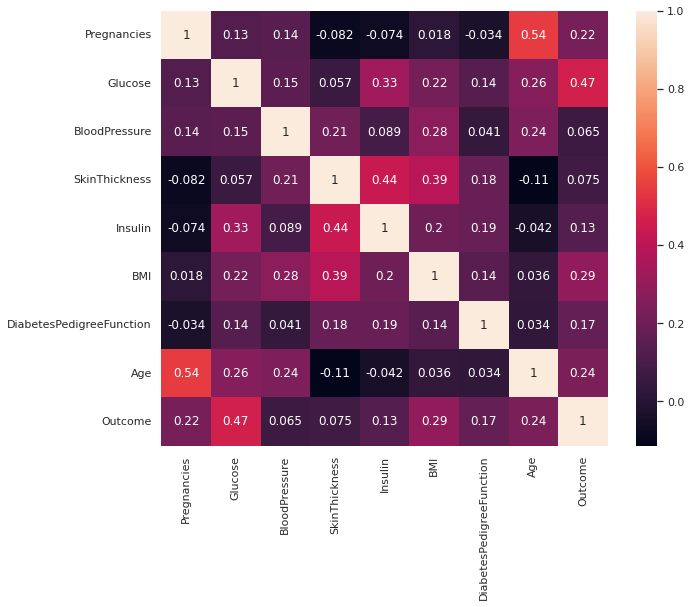

In [128]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot =True)

From the heatmap, we can identify a few things:
1. `Glucose` has the best correlation to `Outcome` out of all other measurements
2. Number of times pregnant somewhat increases with age
3. There is somewhat of a correlation going on with `Insulin` and `SkinThickness`

I always check for correlations when I do any sort of analysis on anything. I think that seeing how one thing correlates with another thing(s) is a great way, if not the best way to learn, especially if you're dealing with true data.<br>
"<i>Men lie, women lie, but numbers don't</i>," is a great quote by I don't exactly know who.

#### 2.3.3 Distributions <a id="2.3.3"></a>
Now let's check the distribution and count of all columns except for the `Outcome` column using seaborn's `.histplot()` function.

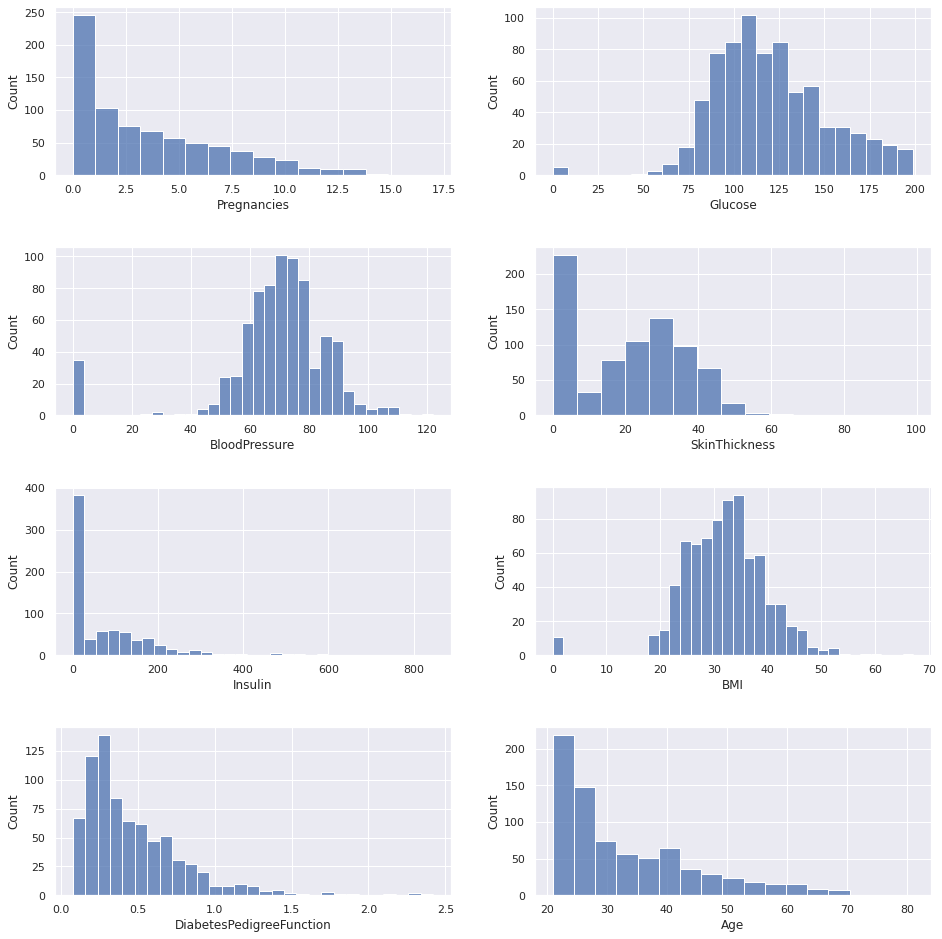

In [129]:
fig, axes = plt.subplots(4, 2, figsize=(14,14))
fig.tight_layout(pad=4.0)

for i,j in enumerate(df.columns[:-1]):
    sns.histplot(df[j], ax=axes[i//2, i%2])

Let's take a step back to understand what this hist plot is telling us.<br>
1. A lot of patients had no pregnancy
2. Most of the patients are younger
3. We're dealing with skewness
4. A LOT of data may be missing

Although some of these information may not matter to our goal, it's best to write them down somewhere just in case you might find use for it later/elsewhere.<br>
As I've mentioned earlier, I knew that having a BMI of 0 is likely impossible, but `BMI` is likely not even our main concern here, take a look at how many patients are missing `Insulin` and `SkinThickness` data. We'll certainly have to do something about this before we train our models with this data. Find out more on the [next chapter](#3), where things get interesting.

***
Click here to go to stats for the dataset with:
1. [Nothing changed (original dataframe)](#2.3.2)
2. [`NaN` substitution](#3.1.3.2)
3. [Mean/Median Imputation](#3.2.1.2)
4. [Iterative Imputation](#3.2.2.4)
***

### 2.4 Conclusions from Analysis<a id="2.4"></a>
1. We're working with data for 768 patients
2. The data, pretty much like all data, consists of outliers
3. The dataset has more patients who don't have diabetes (65.1042% of patients don't have diabetes in this dataset)
4. Out of all other features, `Glucose` has the best correlation to `Outcome`
5. Skewed distribution
6. We may be dealing with missing data



[back to table of contents](#toc)

# 3. Cleaning the Dataset<a id="3"></a>
I'm no psycho, but welcome to the fun part, where I will be going over a few ways in which I will be handling the missing/bad data in this dataset, but first, let's see how much of "bad" data we're dealing with.<br><br>
This is essentially where Person 1 will identify and handle/fix errors in the data to be able to make better decisions. 

### 3.1 Finding and Replacing "Bad" Data with `NaN`<a id="3.1"></a>
I'm going to start off by creating a copy of the original dataframe.<br>
Get ready because things are gonna get dirty.

In [130]:
ndf = df.copy(deep = True)

#### 3.1.1 Zeros are not the Heroes<a id="3.1.1"></a>
Let's take a look at how many 0's are in each column of the dataframe.

In [131]:
(ndf == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

That's crazy.<br>
A lot of zero values in `SkinThickness` and `Insulin`.<br>
To me, things like this is equivalent to taking tylenol for recurring headaches. You're just masking your pain just to <i>get by...</i><br>
Without worrying about `Pregnancies` and `Outcome`, let's convert all zeros in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` to  `NaN` values to manipulate this data.

#### 3.1.2 `NaN` Substitution<a id="3.1.2"></a>

In [132]:
colsToFix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
ndf[colsToFix] = ndf[colsToFix].replace(0, np.NaN)

In [133]:
ndf.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### 3.1.3 Gimme Them Stats!<a id="3.1.3"></a>
Let's now take a look at the description, correlation and distribution of our dataframe after converting zeros to `NaN`'s.<br>
I'll be doing this a few more times, so I'll just create a function to keep the notebook a little more clean.

<b>3.1.3.1 gimmeThemStats Function</b><a id="3.1.3.1"></a>

EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [134]:
def gimmeThemStats(dFrame):
    """
    Description
    ----
    Outputs the general statistical description of the dataframe,
    outputs the correlation heatmap, and outputs a distribution plot.
    
    Parameters
    ----
    dFrame(DataFrame):
        The dataframe for which information will be displayed.
        
    Returns
    ----
    Nothing.
    
    """
    # Description
    print("Descriptive Stats:")
    display(dFrame.describe().T)
    
    # Heatmap
    plt.figure(figsize=(10, 8)) 
    plt.title("Heatmap", fontsize = 'x-large')
    sns.heatmap(dFrame.corr(), annot =True)
    
    # Distribution
    ### NOTE: I changed histplot to distplot
    fig, axes = plt.subplots(4, 2, figsize=(14,14))
    fig.suptitle("Distribution Plot", y=0.92, fontsize='x-large')
    fig.tight_layout(pad=4.0)

    for i,j in enumerate(df.columns[:-1]):
        sns.distplot(dFrame[j], ax=axes[i//2, i%2])

<b>3.1.3.2 Exploring Changes After `NaN` Substitution</b><a id="3.1.3.2"></a>

Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


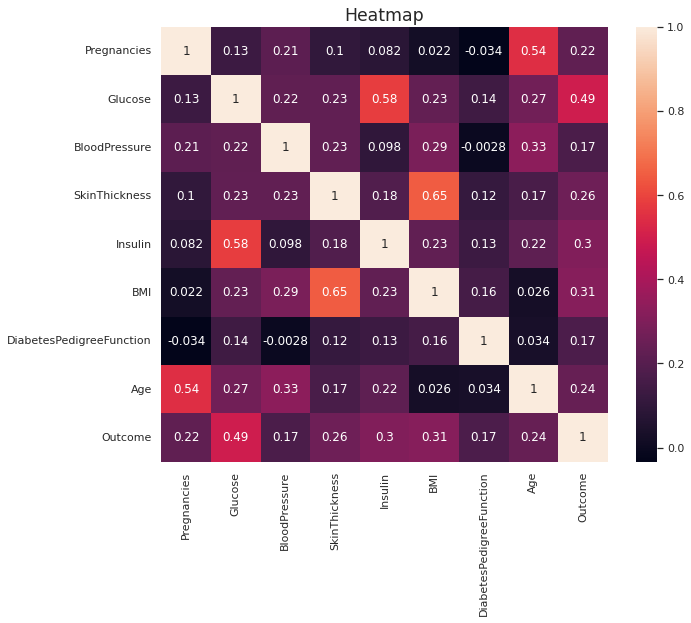

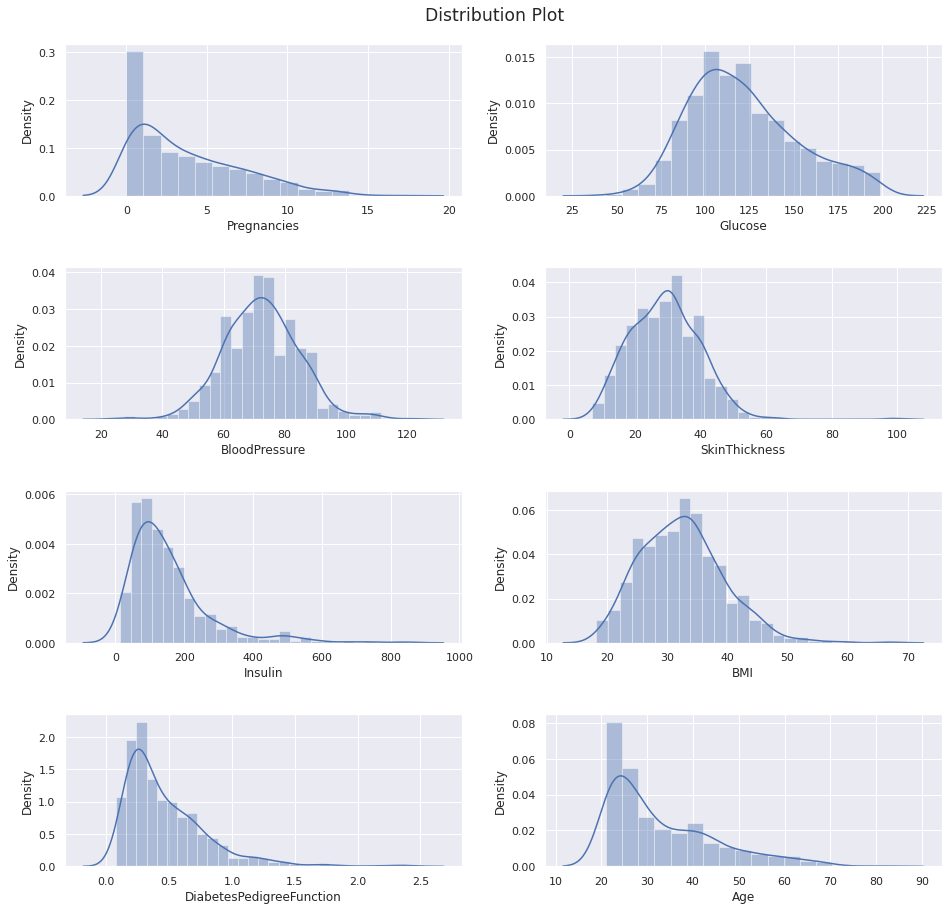

In [135]:
gimmeThemStats(ndf)

Understanding what's changed:
1. We're no longer having to deal with zeros in the columns we've substituted, as you can see in the `min` column in <b>Descriptive Stats</b> and distribution plots
2. Pretty much every column except for `max` had some sort of change after `NaN` substitution
3. Data is still skewed as expected
4. More changes in the correlation heatmap in addition (changes from original dataset):
    - `Glucose` and `Outcome` are slightly more correlated (change from 0.47 --> 0.49)
    - `Insulin` and `SkinThickness` no longer have an important correlation (based on data, 0.44 --> 0.18)
    - Increase in correlation between `BMI` and `SkinThickness` (0.39 --> 0.65)
    - Increase in correlation between `Glucose` and `Insulin` (0.33 --> 0.58)
    
    
    
Now that we've substituted the zeros with `NaN`'s, let's see what we can do to impute missing values in the next section.

***
Click here to go to stats for the dataset with:
1. [Nothing changed (original dataframe)](#2.3.2)
2. [`NaN` substitution](#3.1.3.2)
3. [Mean/Median Imputation](#3.2.1.2)
4. [Iterative Imputation](#3.2.2.4)
***

### 3.2 Handling Missing Data<a id="3.2"></a>
In this section, I'm going to handle the missing data in 2 different ways:
1. [Mean/Median Imputation](#3.2.1)
2. [Iterative Imputer Method](#3.2.2)

#### 3.2.1 Mean/Median Imputation<a id="3.2.1"></a>
In this subsection, let's see how the stats change when we impute the mean/median to the missing values.<br>
First I'm going to create a copy of `ndf`, the dataframe with null values, and call it `dfMeanMed`.

In [136]:
dfMeanMed = ndf.copy(deep = True)

<b>3.2.1.1 You're Skewed!</b><a id="3.2.1.1"></a>

Let's see the skewness measurements of the columns with missing values to get a better idea of whether or not we should use the mean or median to impute missing values. If the data is skewed, we can use the median for a better representation for the missing values. If the data isn't skewed by much, we can replace the missing values with the mean for the column(s).<br>
How exactly can we tell how skewed the data has to be to consider it to be <i>more skewed than not</i>?<br>
Quoting from [kristian.klima](https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241#:~:text=these%20numerical%20measures.-,SKEWNESS,-In%20statistics%2C%20skewness), an author from the [GoodData Commuity](https://community.gooddata.com/):<br>

>    As a general rule of thumb:<br>
        - If skewness is less than -1 or greater than 1, the distribution is highly skewed.<br>
        - If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.<br>
        - If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.<br>
  
   
For our data, if skewness value is between -0.5 and 0.5, I'll use the mean to impute missing values, else, I will use median.

In [137]:
# Note: colsToFix was defined earlier as a list --> ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

dfMeanMed[colsToFix].skew()

Glucose          0.530989
BloodPressure    0.134153
SkinThickness    0.690619
Insulin          2.166464
BMI              0.593970
dtype: float64

Looks like the only column that will be getting a <b>mean</b> imputation is `BloodPressure`, `Glucose` barely made the cut.

In [138]:
dfMeanMed['Glucose'].fillna(dfMeanMed['Glucose'].median(), inplace = True)
dfMeanMed['SkinThickness'].fillna(dfMeanMed['SkinThickness'].median(), inplace = True)
dfMeanMed['Insulin'].fillna(dfMeanMed['Insulin'].median(), inplace = True)
dfMeanMed['BMI'].fillna(dfMeanMed['BMI'].median(), inplace = True)

dfMeanMed['BloodPressure'].fillna(dfMeanMed['BloodPressure'].mean(), inplace = True)

In [139]:
dfMeanMed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<b>3.2.1.2 Gimme Them Stats for the Dataset with Mean/Median Imputations</b><a id="3.2.1.2"></a>

Let's see some stats.

Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


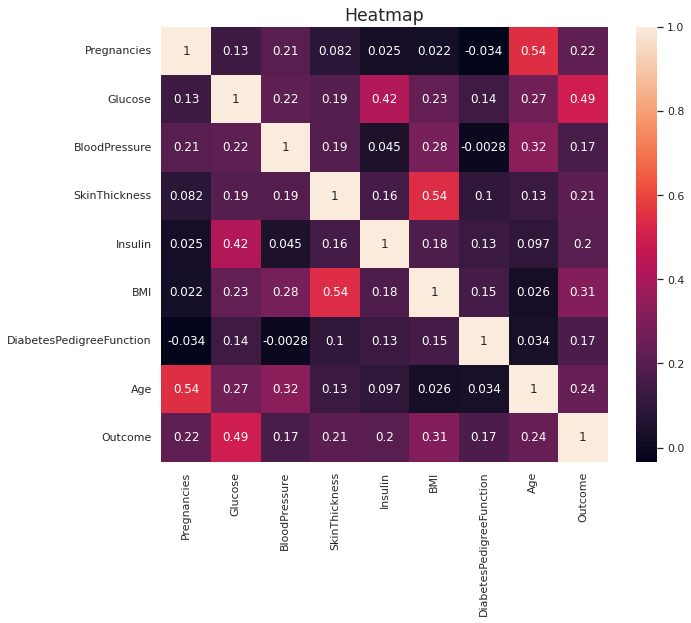

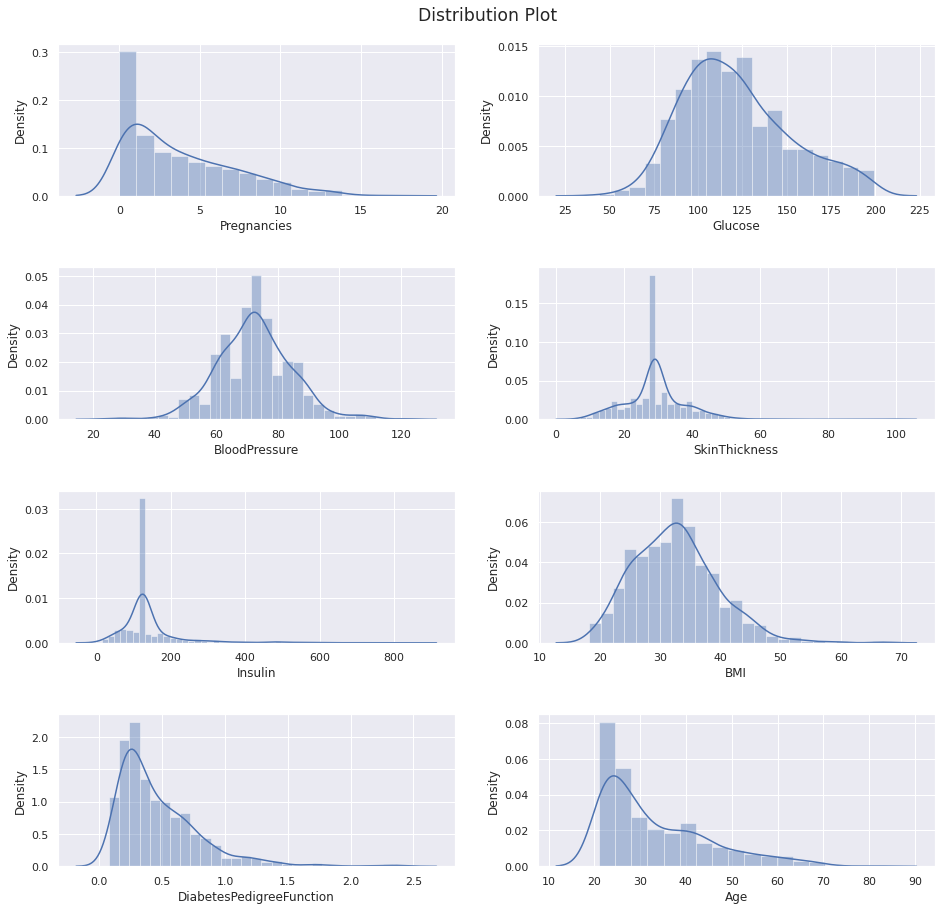

In [140]:
gimmeThemStats(dfMeanMed)

# EXPAND THE OUTPUT BELOW TO SEE STATS OF `dfMeanMed`

We can see that more missing data in a certain column had more impact in the distribution plot for that column. More specifically, the <i>kurtosis</i>, or peakedness changed. Let's see how much the kurtosis measurements changed from the null df (`ndf`) to the Mean/Median df (`dfMeanMed`).

In [141]:
dfMeanMed.kurt() - ndf.kurt()

Pregnancies                 0.000000
Glucose                     0.019192
BloodPressure               0.186626
SkinThickness               2.495496
Insulin                     9.861933
BMI                         0.056843
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

Understanding what's changed from dataset containing nulls:
1. All null values are now filled
2. Slight (not significant) changes in <b>Descriptive Stats</b> after imputations
3. More missing data resulted in more kurtosis in distribution plot from mean/median imputation
4. Slight changes in the correlation heatmap (changes from null dataset):
    - Decrease in correlation between `BMI` and `SkinThickness` (0.65 --> 0.54)
    - Decrease in correlation between `Glucose` and `Insulin` (0.58 --> 0.42)
    
    
    
Let's now go over Iterative Imputation.

***
Click here to go to stats for the dataset with:
1. [Nothing changed (original dataframe)](#2.3.2)
2. [`NaN` substitution](#3.1.3.2)
3. [Mean/Median Imputation](#3.2.1.2)
4. [Iterative Imputation](#3.2.2.4)
***

#### 3.2.2 Iterative Imputation<a id="3.2.2"></a>
Depending on who you are, you will either learn something new in this section, or you won't.<br>
In the beginning, Iterative Imputation may be a lot to take in, but I'll assure you it isn't. I will do my best to keep things as clear as possible.<br><br>

<b>Iterative Imputation</b> refers to a process where each feature is modeled as a function of the other features. Prior imputed values are used to predict subsequent features in a sequential manner ([ref](https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/#:~:text=Iterative%20imputation%20refers,predicting%20subsequent%20features.)).<br>

Iterative Imputation can be done to impute missing data with the use of different estimators. The default estimator used when doing <i>scikit-learn's</i> `IterativeImputer` is the <i>`BayesianRidge()`</i> estimator.<br><br>
<b>Note:</b> This estimator is still <b>experimental</b> for now: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly import `enable_iterative_imputer`.<br>
To learn more about `IterativeImputer`, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).

<b>3.2.2.1 Importing Packages</b><a id="3.2.2.1"></a>

EXPAND THE CELL BELOW TO VIEW IMPORTED PACKAGES

In [142]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

<b>3.2.2.2 Estimators and Imputation Order</b><a id="3.2.2.2"></a>

<u>Estimators:</u><br>
There are 5 estimators that I will be testing out for iterative imputation (check [chapter 5](#5) for the complete imputation walkthrough):
- Bayesian Ridge
- KNeighbors Regressor
- Decision Tree Regressor
- Random Forest Regressor
- Extra Trees Regressor

<u>Imputation Order:</u><br>
`IterativeImputer` also has a parameter called `imputation_order`, which determines the order of imputation, where the default is in `ascending` order.<br>
There are 5 different orders in which features can be imputed:
- Ascending - From features with fewest missing values to most
- Descending - From features with most missing values to fewest
- Roman - Left to right
- Arabic - Right to left
- Random - A random order for each round

<b>3.2.2.3 An `IterativeImputer` Example</b><a id="3.2.2.3"></a>

Let's go over an example on using `IterativeImputer`. The way I do it is as follows: define the imputer, then `fit` on the dataset, and finally impute all missing values in the dataset by calling `transform`.<br>
For this example, I'll use <i>Decision Tree Regressor</i> with a <i>descending</i> order.<br><br>

<b>NOTE:</b> Although yes, it can be easier to use a pipeline to keep code more clean, for this tutorial, I'm going to demonstrate imputing, scaling and modeling without the use of pipeline.

In [143]:
# Choose an estimator if you don't want the default BayesianRidge() estimator
exEstimator = DecisionTreeRegressor(max_features='sqrt', random_state=42)
# Choose a style if you don't want the default ascending order
exStyle = 'descending'

# Imputer definition
exImputer = IterativeImputer(estimator=exEstimator, imputation_order=exStyle, random_state=42)

In [144]:
# No, you don't have to run this, just showing you the output of it
exImputer

IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt',
                                                 random_state=42),
                 imputation_order='descending', random_state=42)

Now, let's make a copy of the null dataframe (`ndf`) to run the imputer on, and`fit` on the dataset.<br>
The next step is to call `transform` which will impute the missing values. `transform` returns an array, so I will convert the array to a dataframe.

In [145]:
# Make a copy
edf = ndf.copy(deep = True)

# Fit on the dataset
exImputer.fit(edf)

# Transform and convert to a dataframe
exTrans = pd.DataFrame(exImputer.transform(edf), columns = edf.columns)

exTrans

# EXPAND OUTPUT BELOW TO VIEW THE DATAFRAME WITH ITERATIVE IMPUTATIONS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,245.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,55.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,19.0,132.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,194.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,23.0,846.0,30.1,0.349,47.0,1.0


In [146]:
exTrans.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see that there are no null values.<br>
Let's explore the stats of this updated dataset in the next section.

<b>3.2.2.4 Gimme Them Stats for the Dataset with Iterative Imputation</b><a id="3.2.2.4"></a>

I know you wanna see it

Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.756510,30.577439,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,768.0,72.308594,12.391793,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,28.924479,10.510789,7.000,21.00000,29.0000,36.00000,99.00
Insulin,768.0,164.580729,129.770929,14.000,76.00000,126.0000,204.25000,846.00
BMI,768.0,32.428125,6.921562,18.200,27.47500,32.2500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


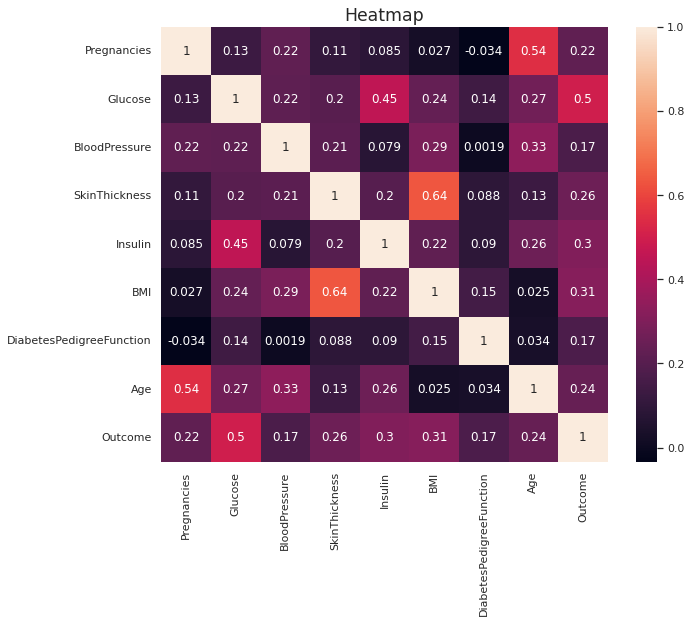

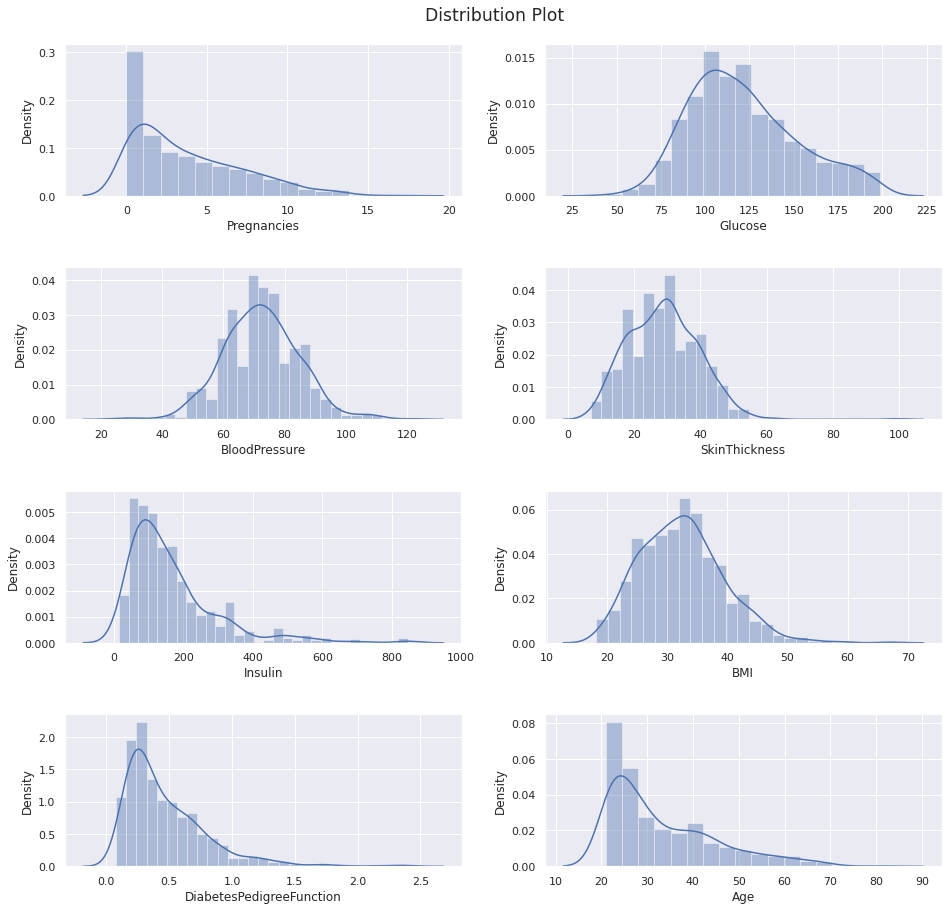

In [147]:
gimmeThemStats(exTrans)

# EXPAND OUTPUT BELOW TO VIEW STATS FOR `exTrans`

<a id="negatives"></a>
Also, one thing to note, in some cases, some estimators will impute negative numbers. We don't want any negative numbers or any more zeros imputed back into the dataset.<br>
Although we can check the minimum in the `min` column of the <b>Descriptive Stats</b>, if we were to have any negative values or zeros in the dataset, we can detect it using the `le()` function on our dataframe.

In [148]:
exTrans.le(0).any()

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

Understanding what's changed from dataset containing nulls:
1. All null values are now filled
2. Slight (not significant) changes in <b>Descriptive Stats</b> after imputations
3. Since different numbers were imputed, we don't see crazy kurtosis like how we did when we imputed the mean/median, overall the distribution plots for this dataframe seem to have kept the original shape of the distribution plots of the dataframe containing nulls (`ndf`)
4. Slight changes in the correlation heatmap (changes from null dataset):
    - Decrease in correlation between `Glucose` and `Insulin` (0.58 --> 0.45)
    - Very slight changes in correlations between other features
    
    
Now that we're done with imputing missing values, let's go do some modeling (or modelling - however you wanna spell it).

***
Click here to go to stats for the dataset with:
1. [Nothing changed (original dataframe)](#2.3.2)
2. [`NaN` substitution](#3.1.3.2)
3. [Mean/Median Imputation](#3.2.1.2)
4. [Iterative Imputation](#3.2.2.4)
***

<br>

[back to table of contents](#toc)

# 4. Modelling<a id="4"></a>
You made it through, but now here's the boring part, modeling, or modelling, however you spell it, [it doesn't matter](https://memegenerator.net/img/instances/67758912/i-feel-it-doesnt-matter-how-it-makes-you-feel.jpg).

First we'll start off by splitting the dataset, then we will scale the train and test splits separately to avoid data leakage, and finally we'll be doing some modeling.<br>
I will be using the dataset with iterative imputations for this example.

### 4.1 Importing Packages<a id="4.1"></a>
EXPAND THE CELL BELOW TO VIEW IMPORTED PACKAGES

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import ExtraTreesClassifier

### 4.2 Splitting the Data<a id="4.2"></a>
Now we'll split the data. First we define `X` as all columns except the `Outcome` column, and `y` as the `Outcome` column.<br>
Then we do the split. I'm going to use `test_size` of 0.2. I will also set `stratify=y` for a more proportionate data split.

In [150]:
# Define X for features, where exTrans is the dataset with iterative imputation
X = exTrans.drop('Outcome', axis=1)

# Define y
y = exTrans['Outcome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [151]:
y_train.value_counts()

0.0    400
1.0    214
Name: Outcome, dtype: int64

In [152]:
y_test.value_counts()

0.0    100
1.0     54
Name: Outcome, dtype: int64

We can see that approximately 65.1466% (400/614) of patients in the train set does not have diabetes, and approximately 64.9351% (100/154) of patients in the test set does not have diabetes, which is very close to 65.1042%, which is the percentage of patients who did not have diabetes in the original dataset (thanks to my man `stratify`).

Now let's move onto scaling our dataset.

### 4.3 Scaling the Data<a id="4.3"></a>

Let's now scale the dataset.<br>
First we define the scaler, I will be using `StandardScaler()`. Then we fit and transform the training set, and transform the test set.

In [153]:
# Scaler definition
exScaler = StandardScaler()

# Fit and transform the train set
exScaledTrainSet = exScaler.fit_transform(X_train)
# Transform the test set
exScaledTestSet = exScaler.transform(X_test)

### 4.4 Modelling the Data<a id="4.4"></a>
Now we'll move onto doing some modeling.<br>
For modeling, I will use 9 different classifiers:
- LinearSVC
- SVC with `kernel='rbf'`
- GaussianNB
- KNeighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Extra Trees Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier

#### 4.4.1 A Modelling Example<a id="4.4.1"></a>
In this section, I will use Extra Trees Classifer as an example. In [section 5.6](#5.6), you'll be able to see all the models in action.<br>
First comes the model definition, then fitting on the scaled training set for `X` and the training set `y`, and then predicting on the test set.

In [154]:
# Model definition
exModel = ExtraTreesClassifier()

# Fit the model and training sets
exModel.fit(exScaledTrainSet, y_train)

# Predict
exPredict = exModel.predict(exScaledTestSet)

#### 4.4.2 Prediction Analysis<a id="4.4.2"></a>
Let's analyze our model's predictions.

<b>4.4.2.1 Accuracy Score for our Example</b><a id="4.4.2.1"></a>

In [155]:
exAccScore = accuracy_score(y_test, exPredict)
print(f"Our model got an accuracy score of {exAccScore*100:.4f}% when using a Decision Tree Regressor estimator to Iteratively Impute\nin a descending fashion, after predictions from Extra Trees Classifier.")

Our model got an accuracy score of 73.3766% when using a Decision Tree Regressor estimator to Iteratively Impute
in a descending fashion, after predictions from Extra Trees Classifier.


You get the gist, the model got an accuracy score of approximately 73.3766%. Not a good accuracy score, but there are countless of options available, given the number of models, estimators and imputation orders we can use, maybe we can get a better score using a different combination. I'll go over how we can do this in [chapter 5](#5).


<b>4.4.2.2 Confusion Matrix </b><a id="4.4.2.2"></a>

The confusion matrix may confuse many but won't confuse you after reading this section.

In [156]:
confusion_matrix(y_test, exPredict)

array([[82, 18],
       [23, 31]])

Let's break this down into pieces:
- Remember that our test set contained 154 records in total.
- Of the 154 records, 100 of them were `0`, or diabetes negative.
- Of the 154 records, 54 of them were `1` or diabetes positive.
- The first array of the matrix is the total diabetes negative patients in our test set (82+18=100).
- The second array of the matrix is the total diabetes positive patients in our test set (23+31=54).
- In this 2x2 confusion matrix, 82 (the [0][0] index) is the `True Negative`.
    - This means that the model correctly predicted 82 patients to be <b>truly</b> diabetes <b>negative</b>.
- The index [0][1] is the second part of the first array, the value: 18. This value is the `False Positive`.
    - This means that the model incorrectly predicted (claimed) 18 patients to have diabetes, when they actually didn't.
    - Another way to think of it: 18 <b>false</b> predictions of diabetes <b>positive</b>.
- The index [1][0] is the first part of the second array, the value: 23. This value is the `False Negative`.
    - This means that the model incorrectly predicted (claimed) 23 patients to NOT have diabetes, when they actually did.
    - Another way to think of it: 23 <b>false</b> predictions of diabetes <b>negative</b>.
- The index [1][1] is the second part of the second array, the value: 31. This value is the `True Positive`.
    - This means that the model correctly predicted (claimed) 31 patients to be <b>truly</b> diabetes <b>positive</b>.

Simply, the design of this matrix is as follows:
```
[  [0][0] , [0][1]  ]
[  [1][0] , [1][1]  ]
```
OR
```
[TN, FP]
[FN, TP]
```

Where,
```
TN = True Negative   --> [0][0]
FP = False Positive  --> [0][1]
FN = False Negative  --> [1][0]
TP = True Positive   --> [1][1]
```

The way I like to think of it is that each part of the confusion matrix (TN, FP, FN, TP) has their own index pair ([0][0], [0][1], [1][0], [1][1]) and the second index of each pair either stands for Positive or Negative, where [0] = negative and [1] = positive. If both index of a pair are the same number, then they're meant for each other, they're <b>true</b>, if the two numbers are different in the pair, they're not meant be, they're false.

<b>4.4.2.3 Classification Report</b><a id="4.4.2.3"></a>

Let's now look at the precision score, recall score, and the f1-score. These measurements are used to determine the <i>quality</i> of the model's predictions.

<u>Precision Score:</u><br>
The precision score is the calculation/accuracy of correctly identified diabetic positives/negatives from the total <i>model-claimed</i> number of positive/negative diabetics.<br>
A simple way to remember what the values from the confusion matrix the precision score uses to calculate it's values is by remembering that the precision score only deals with the same j<sup>th</sup> index per [i,j] pair, so the precision score's index pairs are:<br>
`([0][1] and [1][1])` AND `([0][0] and [1][0])`.<br>
OR another way to look at it is the precision score only deals with either positives or negatives, but not both:<br>
`(FP and TP)` AND `(TN and FN)`.<br>
There are two precision scores, one for diabetic positive predictions and one for diabetic negative predictions.<br>
The precision score for diabetic positives is: `TP/(TP + FP)`<br>
The precision score for diabetic negatives is: `TN/(TN + FN)`<br>

<u>Recall Score:</u><br>
The recall score is the calculation/accuracy of correctly identified diabetic positives/negatives from the total (<i>actual</i>) number of positive/negative diabetics.<br>
A simple way to remember what values from the confusion matrix the recall score uses to calculate it's values is by remembering that the recall score only sticks to the same array of the 2 arrays in the matrix, so the recall score's index pairs are:<br>
`([0][0] and [0][1])` AND `([1][0] and [1][1])`. <br>
OR<br>
`(TN and FP)` AND `(FN and TP)`<br>
If the pair contains more than one of the same letters in TNFP, it ain't recall.<br>
Just like precision score, there are also two recall scores.<br>
The recall score for diabetic positives is: `TP/(TP + FN)`<br>
The recall score for diabetic negatives is: `TN/(TN + FP)`

<u>F1-Score:</u><br>
The F1 score is the calculation of the weighted average of the precision and recall score. There are also two f1-scores.<br>
The f1-score for diabetic positives and negatives is the same as follows: `2 * (precision * recall) / (precision + recall)`.


We can see the precision, recall and f1 scores all in one chart by  calling the `classifiation_report()` function.

In [157]:
print(classification_report(y_test, exPredict, target_names=['Diabetic Neg.', 'Diabetic Pos.']))

               precision    recall  f1-score   support

Diabetic Neg.       0.78      0.82      0.80       100
Diabetic Pos.       0.63      0.57      0.60        54

     accuracy                           0.73       154
    macro avg       0.71      0.70      0.70       154
 weighted avg       0.73      0.73      0.73       154



Our confusion matrix is:
```
array([[82, 18],
       [23, 31]])
```
Let's look at the diabetic <b>negatives</b> scores:
- The precision score is: `82 / (82+23) ≈ 0.78`, where `82+23 = 105`, the number of patients the model marked as diabetic negative.
    - This means that out of all the 105 patients the model marked to be diabetic negative, the model was approximately 78% precise.
- The recall score is: `82 / (82+18) = 0.82`, where `82+18 = 100`, the number of total actual diabetic negative patients.
    - This means that out of all the 100 actual diabetic negative patients, the model predicted 82% of them correctly.
    
Let's look at the diabetic <b>positives</b> scores:
- The precision score is: `31 / (31+18) ≈ 0.63`, where `31+18 = 49`, the number of patients the model marked as diabetic positive.
    - This means that out of all the 49 patients the model marked to be diabetic positive, the model was approximately 63% precise.
- The recall score is: `31 / (31+23) ≈ 0.57`, where `31+23 = 54`, the number of total actual diabetic positive patients.
    - This means that out of all the 54 actual diabetic positive patients, the model predicted approximately 57% of them correctly.
    
    
Speaking without knowing any more about diabetes, I would assume that a model correctly predicting the number of patients to have actually have diabetes is more important than a model incorrectly predicting a patient has diabetes when they actually don't. Let's explore other estimator/model/imputation-order sets in the next chapter to see which set(s) perform the best overall.

<br>

[back to table of contents](#toc)

# 5. Testing Other Model Sets<a id="5"></a>
Remember in chapter 4 when I said that modeling is the boring part? Well I kinda lied, I actually like modeling. I may not be the best at it, but I know I'm getting better. You know what they say, the older the wine the finer it gets, you know what I'm sayin'?

In this chapter, we will explore the different model sets and their results.<br>
The number of sets you'll have in the end is entirely up to you. For me, I'll be working with the 5 estimators, the 5 imputation order styles, and the 9 classifiers of which I spoke about in earlier chapters.

<u>Estimators:</u>
- Bayesian Ridge
- KNeighbors Regressor
- Decision Tree Regressor
- Random Forest Regressor
- Extra Trees Regressor

<u>Imputation Orders:</u>
- Ascending - From features with fewest missing values to most
- Descending - From features with most missing values to fewest
- Roman - Left to right
- Arabic - Right to left
- Random - A random order for each round

<u>Models:</u>
- LinearSVC
- SVC with `kernel='rbf'`
- GaussianNB
- KNeighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Extra Trees Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier

This means that in the end, I will have 5x5 = 25 different iterative imputed datasets, and 25x9 = 225 different model-estimator-order sets, which means 225 accuracy scores.

Also, in this chapter, I'm going to be throwing a few functions at you, but I have faith that you'll be able to catch what's going on in the functions because it's simply what I did in the previous chapter, but in separate functions. Don't worry, I'll explain in short what my functions do, and the best part is, you can reuse these functions to test out your own model pairs.

### 5.1 Step 1: Importing Packages<a id="5.1"></a>
First steps first, let's import some packages that will be used for modeling.<br>
EXPAND THE CELL BELOW TO VIEW IMPORTED PACKAGES

In [158]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 5.2 Step 2: Making our Lists<a id="5.2"></a>
Let's make our lists.

In [159]:
estimatorList = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=42),
    ExtraTreesRegressor(n_estimators=10, random_state=42),
    RandomForestRegressor(criterion='mse', n_estimators=10, random_state=42),
    KNeighborsRegressor(n_neighbors=15)
]

imputation_styles = ['ascending', 'descending', 'roman', 'arabic', 'random']

classifications_list = [
    LinearSVC(C= 5.0, class_weight="balanced"), SVC(kernel='rbf'), GaussianNB(), 
    KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(), RandomForestClassifier(),
    ExtraTreesClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

### 5.3 Step 3: Iterative Imputation<a id="5.3"></a>
Now we handle missing data before we try anything else.

#### 5.3.1 FUNCTION: imputeEm<a id="5.3.1"></a>
I'll define a function called `imputeEm` whose main purpose is to iteratively impute missing values based on a given estimator list and imputation style list.<br>


EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [160]:
def imputeEm(adf, estimList, stylesList):
    """
    Description
    ----
    Iteratively imputes missing values to a dataset by following a 
    given estimator and imputation-order pair.
    If an estimator or imputation order throws an error, an error
    will be printed after function call explaining why the error
    occured. If no error is found for a given estimator or imputation
    order, no errors will be printed in the end of the function call.
    An error thrown for an estimator and imputation order pair won't 
    affect other pairs. You'll still get the results you sought for.
    
    Parameters
    ----
    adf (dataframe):
        The dataframe containing missing values.
        
    estimList (list of models):
        The list of estimators to use in IterativeImputer.
    
    stylesList (list of str):
        The list of styles to use in IterativeImputer.
    
    Returns
    ----
    estim_name_list (list of str):
        A list of the name of the estimator used in each iteration.
        For example, if there are 5 imputation-order styles per each 
        estimator, then the list will contain each estimator 5 times.
    
    style_list (list of str):
        A list of the name of the imputation-order used in each
        iteration. For example, if there are 10 estimators used, 
        the list will include each imputation-order 10 times.
        
    imputed_df_list (list of dataframes):
        A list of dataframes for each estimator and imputation-order
        pair.
    """
    
    # The returned lists
    style_list = []
    estim_name_list = []
    imputed_df_list = []
    
    # Loop through each estimator
    for estim in range(len(estimList)):
        
        # Convert estimator to string format and debolish parenthesis and anything in between
        estimstorName = re.sub(r"\([^()]*\)", '', str(estimList[estim])) 
        
        # Loop through each imputation-order
        for style in stylesList:
            
            try:
                # Introduce Iterative Imputer with estimator and imputation_order
                imputer = IterativeImputer(random_state=42, estimator=estimList[estim], imputation_order=style)
                # Fit on dataframe
                imputer.fit(adf)
            except Exception as e:
                print("==============================================================")
                print(f"I wasn't able to iteratively impute with the estimator: {estimList[estim]} and imputation order: {style}.")
                print(f"This was the error I've received from my master:\n\n{e}.")
                print("\nI didn't let it faze me though, for now I've skipped this imputation pair.")
                print("==============================================================\n")
            else:
                estim_name_list.append(estimstorName) #Appending estimator name
                style_list.append(style) #Appending style name
                
                # Transform and append the imputed dataframe to the list of imputed dataframes
                imputed_df_list.append(pd.DataFrame(imputer.transform(adf), columns = adf.columns))
            
            
    return estim_name_list, style_list, imputed_df_list

#### 5.3.2 Let's imputeEm!<a id="5.3.2"></a>
Let's look at our results after we run our new function.

In [161]:
# It doesn't take too long, but that mainly depends on the amount of estimators you're using
data = imputeEm(ndf, estimatorList, imputation_styles)

`data` now contains a list of estimators, a list of styles, and a list of datasets with their imputed values.<br>
Let's take a look at each of them to understand how indexing with `data` works.

In [162]:
data[0] # The list containing the estimator per iteration

# EXPAND THE CELL BELOW TO VIEW OUTPUT

['BayesianRidge',
 'BayesianRidge',
 'BayesianRidge',
 'BayesianRidge',
 'BayesianRidge',
 'DecisionTreeRegressor',
 'DecisionTreeRegressor',
 'DecisionTreeRegressor',
 'DecisionTreeRegressor',
 'DecisionTreeRegressor',
 'ExtraTreesRegressor',
 'ExtraTreesRegressor',
 'ExtraTreesRegressor',
 'ExtraTreesRegressor',
 'ExtraTreesRegressor',
 'RandomForestRegressor',
 'RandomForestRegressor',
 'RandomForestRegressor',
 'RandomForestRegressor',
 'RandomForestRegressor',
 'KNeighborsRegressor',
 'KNeighborsRegressor',
 'KNeighborsRegressor',
 'KNeighborsRegressor',
 'KNeighborsRegressor']

In [163]:
data[1] # The list containing the imputation order per iteration

# EXPAND THE CELL BELOW TO VIEW OUTPUT

['ascending',
 'descending',
 'roman',
 'arabic',
 'random',
 'ascending',
 'descending',
 'roman',
 'arabic',
 'random',
 'ascending',
 'descending',
 'roman',
 'arabic',
 'random',
 'ascending',
 'descending',
 'roman',
 'arabic',
 'random',
 'ascending',
 'descending',
 'roman',
 'arabic',
 'random']

In [164]:
# Running data[2] will output the list containing all dataframes.
# Here, we're looking at the head() of the 7th dataframe by running the code below.
print(f"Estimator: {data[0][7]}")
print(f"Imputation order: {data[1][7]}")
data[2][7].head()

Estimator: DecisionTreeRegressor
Imputation order: roman


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,160.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,41.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.0,170.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


Because I've used 5 estimators and 5 imputation orders, I get a dataframe for each estimator and imputation order pair.<br>
In total, 25 different dataframes.

In [165]:
len(data[2])

25

#### 5.3.3 Negative imputations?<a id="5.3.3"></a>
[Earlier](#negatives) I spoke a little about models imputing possible negative numbers.<br>
In this subsection, I'll go over how to find any imputations less than or equal to 0.

<b>5.3.3.1 FUNCTION: invalidNumberChecker</b><a id="5.3.3.1"></a>

I'll start off by creating another function. This function's main goal is to check every row and column pair (for column names in `colsToFix`) for values less than or equal to 0.<br>It will then display:<br>
- Dataframe number: The i<sup>th</sup> dataframe in `data[2][i]` in which the invalid number was caught
- Estimator: Estimator used in the dataframe number
- Order: Imputation order used in the dataframe number
- A set of description for each invalid number within the dataframe which includes:
    - Index: The index of the dataframe where the invalid number lives
    - Column: The column that contains the invalid number
    - Value: The invalid number itself
- A dataframe display of the rows with invalid number(s)

If your iterative imputations didn't impute any invalid numbers, this function will display nothing.


<b>EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION</b>

In [166]:
def invalidNumberChecker(dataList):
    """
    Description
    ----
    This function will check for values less than or equal to 0 within a dataframe. 
    The function displays several things including: 
        1. The Dataframe number: The ith dataframe in `dataList[2][i]` in which the 
        invalid number was caught.
        2. Estimator: Estimator used in the dataframe number.
        3. Order: Imputation order used in the dataframe number.
        4. A set of description for each invalid number within the dataframe which 
        includes:
            4a. Index: The index of the dataframe where the invalid number lives.
            4b. Column: The column that contains the invalid number.
            4c. Value: The invalid number itself.
        5. A dataframe display of the rows with invalid number(s).
    
    Parameters
    ----
    dataList (list of lists):
        The list containing a list of models, list of imputation orders, and
        list of dataframes which was obtained after running function `imputeEm`.
    
    Returns
    ----
    Nothing.
    
    """
    # Loop through every dataframe in the list of dataframes
    for i in range(len(dataList[2])):
        # index_list will hold the indices where invalid numbers live
        index_list = []
        # invalid_pairs is a list containing pairs (tuples) of rows and column names where invalid numbers live
        invalid_pairs = dataList[2][i][colsToFix][dataList[2][i][colsToFix] <= 0].stack().index.tolist()
        if(invalid_pairs):
            print(f'Dataframe # {i}  --  For reference, check dataList[2][{i}], where dataList is the list obtained after running function `imputeEm`.')
            print('--------------')
            print(f'Estimator: {dataList[0][i]}\nOrder: {dataList[1][i]}\n')
            for j in range(len(invalid_pairs)):
                index_list.append(invalid_pairs[j][0])
                print(f'Index: {invalid_pairs[j][0]}\nColumn: {invalid_pairs[j][1]}')
                print(f'Value: {dataList[2][i][invalid_pairs[j][1]].loc[invalid_pairs[j][0]]}\n')
            display(dataList[2][i].loc[index_list])
            print("==================================================================================================\n\n")
            

<b>5.3.3.2 Your Number Cannot be Completed as Dialed</b><a id="5.3.3.2"></a><br>
Let's check our numbers and dial again.

In [167]:
invalidNumberChecker(data)

# EXPAND OUTPUT TO SEE INVALID NUMBERS

Dataframe # 0  --  For reference, check dataList[2][0], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: ascending

Index: 62
Column: Insulin
Value: -19.5017191783991



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,21.038587,-19.501719,25.0,0.587,36.0,0.0




Dataframe # 1  --  For reference, check dataList[2][1], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: descending

Index: 62
Column: Insulin
Value: -19.50182389281946



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,21.0384,-19.501824,25.0,0.587,36.0,0.0




Dataframe # 2  --  For reference, check dataList[2][2], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: roman

Index: 62
Column: Insulin
Value: -19.501713288031397



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,21.038596,-19.501713,25.0,0.587,36.0,0.0




Dataframe # 3  --  For reference, check dataList[2][3], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: arabic

Index: 62
Column: Insulin
Value: -19.501827119739545



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,21.038396,-19.501827,25.0,0.587,36.0,0.0




Dataframe # 4  --  For reference, check dataList[2][4], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: random

Index: 62
Column: Insulin
Value: -19.50171170788738



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,21.038595,-19.501712,25.0,0.587,36.0,0.0


<b>5.3.3.3 Handling Invalid Numbers</b><a id="5.3.3.3"></a><br>

Looks like we got some results back for invalid numbers.<br>
From the output, it seems  that `BayesianRidge()` is the only estimator that imputed invalid number(s), and it also looks like ALL imputation orders were caught imputing an invalid number on the SAME index number, for the SAME  column with very similar values.<br>
Let's look more in-depth to see what we can do about this invalid number.

For one, we know that the other estimators didn't output an invalid number for the 62<sup>nd</sup> index for `Insulin`.<br>
Maybe the 62<sup>nd</sup> index is a strange outlier of some sort?<br>
Let's see if the mean of all 62<sup>nd</sup> index for each Estimator has any weird numbers.

In [168]:
start = 0
stop = len(imputation_styles)
diff = stop - start
print("Printing the mean of all values of the 62nd index for each estimator in column: Insulin")
print("=======================================================================================")
for i in range(len(estimatorList)):
    value = 0   
    name = re.sub(r"\([^()]*\)", '', str(estimatorList[i]))
    for j in range(len(data[2][start:stop])):
        value += data[2][start:stop][j].iloc[62]['Insulin']
    start = stop
    stop += diff
    value /= diff
    
    print(f"Estimator: {name}\nMean:{value}\n")

Printing the mean of all values of the 62nd index for each estimator in column: Insulin
Estimator: BayesianRidge
Mean:-19.501759037375376

Estimator: DecisionTreeRegressor
Mean:62.6

Estimator: ExtraTreesRegressor
Mean:54.3

Estimator: RandomForestRegressor
Mean:49.339999999999996

Estimator: KNeighborsRegressor
Mean:54.466666666666676



We can see that the other 62<sup>nd</sup> index of the other estimators seem to be fine.<br>
Since that's the case, let's not remove the the 62<sup>nd</sup> index of all estimators, and replace it with either the mean/median based on the skewness. Since we're dealing with the first 5 dataframes in `data[2]`, this makes our job a little easier.<br>
Let's look at the skewness value for each dataframe's `Insulin` column.

In [169]:
for i in range(5):
    print(f"Dataframe #{i}")
    print(f"Minimum Value: {data[2][i]['Insulin'].min()}")
    print(f"Skewness: {data[2][i]['Insulin'].skew()}\n")

Dataframe #0
Minimum Value: -19.5017191783991
Skewness: 2.1427567531455756

Dataframe #1
Minimum Value: -19.50182389281946
Skewness: 2.1427744476981823

Dataframe #2
Minimum Value: -19.501713288031397
Skewness: 2.1427612867515826

Dataframe #3
Minimum Value: -19.501827119739545
Skewness: 2.1427722997950247

Dataframe #4
Minimum Value: -19.50171170788738
Skewness: 2.1427602693296746



The skewness for the `Insulin` column is very high, let's replace the invalid numbers with the median.

In [170]:
for i in range(5):
    print(data[2][i]['Insulin'].median())

130.12770737911464
130.1277119209768
130.12771535689234
130.12770830066552
130.12771875372806


In [171]:
for i in range(5):
    data[2][i]['Insulin'][62] = data[2][i]['Insulin'].median()

Now if we run our function `invalidNumberChecker` again, we shouldn't receive any results.

In [172]:
invalidNumberChecker(data)

Looks good! Let's now move onto splitting out datasets into training and testing sets.

### 5.4 Step 4: Train & Test Split<a id="5.4"></a>
Let's now produce a train and test split for each dataframe.

#### 5.4.1 FUNCTION: produceSplits<a id="5.4.1"></a>
This function will simply split dataframes into train and test sets.

EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [173]:
def produceSplits(dataList, testSize=0.2):
    """
    Description
    ----
    Splits a list of dataframes into train and test sets based
    on given testSize for train_test_split.
    For each dataframe in dfList, the X_train, X_test, y_train,
    and y_test are appended into separate lists.
    Each split will use the same index for all dataframes in 
    dataList[2] to reduce bias when comparing results after 
    modeling.
    
    Parameters
    ----
    dataList (list of dataframes):
        The list containing a list of models, list of imputation 
        orders, and list of dataframes which was obtained after 
        running function `imputeEm`.
    
    testSize (float):
        The test_size that you want to give for train_test_split.
        The default test_size is set to 0.2.
        
    Returns
    ----
    Xtrain_list (list of dataframes):
        A list containing the X_train split for each dataframe
        in dfList.
    
    Xtest_list (list of dataframes):
        A list containing the X_test split for each dataframe
        in dfList.
        
    ytrain_list (list of series):
        A list containing the y_train split for each dataframe
        in dfList.
        
    ytest_list (list of series):
        A list containing the y_test split for each dataframe
        in dfList.
    
    """
    
    # Returned train and test splits lists
    Xtrain_list = []
    Xtest_list = []
    ytrain_list = []
    ytest_list = []
    
    # Loop through each dataframe in dataList[2]
    for dFrame in range(len(dataList[2])):
        # Inputs
        X = dataList[2][dFrame].drop('Outcome', axis=1)
        # Output
        y = dataList[2][dFrame]['Outcome']
        # Train and test split with given testSize, where the default is 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42, stratify = y)
        # Append the splits to each list
        Xtrain_list.append(X_train)
        Xtest_list.append(X_test)
        ytrain_list.append(y_train)
        ytest_list.append(y_test)
    
    return Xtrain_list, Xtest_list, ytrain_list, ytest_list

#### 5.4.2 Producing Splits<a id="5.4.2"></a>
<i>A reason to continue on.</i>

In [174]:
# Production
X_train_list, X_test_list, y_train_list, y_test_list = produceSplits(data)

The size of all `X_train` in `X_train_list` is the same, the size of all `X_test` in `X_test_list` is the same, etc.<br>
Also each split used the same indices from each dataframe to reduce bias.<br>
The indices used in `X_train_list[2]` will be the same as the indices used in `X_train_list[7]`, as well as `X_train_list[13]`, etc.

In [175]:
print(f"The size of each X_train in X_train_list is {len(X_train_list[4])}")
print(f"The size of each X_test in X_test_list is {len(X_test_list[4])}")

The size of each X_train in X_train_list is 614
The size of each X_test in X_test_list is 154


In [176]:
X_train_list[7].head()

# EXPAND OUTPUT TO SEE THE FIRST 5 ROWS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0
711,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0
46,1.0,146.0,56.0,29.0,83.0,29.7,0.564,29.0
682,0.0,95.0,64.0,39.0,105.0,44.6,0.366,22.0


In [177]:
X_train_list[13].head()

# EXPAND OUTPUT TO SEE THE FIRST 5 ROWS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0
711,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0
46,1.0,146.0,56.0,30.3,170.1,29.7,0.564,29.0
682,0.0,95.0,64.0,39.0,105.0,44.6,0.366,22.0


### 5.5 Step 5: Scaling<a id="5.5"></a>
Now let's do some scaling on our training and testing datasets.<br>
Remember, we `fit_transform` the training set, and we `transform` the testing set.<br>
For debugging purposes, I'll convert the scaled results into a dataframe.

I'll show you the weigh.

#### 5.5.1 FUNCTION: weightForMe<a id="5.5.1"></a>
This function will scale the training and testing sets using `StandardScaler()`.

EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [178]:
def weightForMe(trainList, testList):
    """
    Description
    ----
    Standardizes the training and testing input sets 
    using StandardScaler().
    The training features are fit and then transformed.
    The testing features are transformed.
    
    Parameters
    ----
    trainList (list of dataframes):
        The list of dataframes of the training set obtained
        after running function `produceSplits`.

    testList (list of dataframes):
        The list of dataframes of the testing set obtained
        after running function `produceSplits`.
        
    Returns
    ----
    list_of_scaled_train_dfs (list of dataframes):
        List of dataframes of each `X_train` after scale.
        
    list_of_scaled_test_dfs (list of dataframes):
        List of dataframes of each `X_test` after scale.
    """
    # Returned lists
    list_of_scaled_train_dfs = []
    list_of_scaled_test_dfs = []
    
    # Iterate through each `X_train` and `X_test` in `trainList`
    for i in range(len(trainList)):
        # Introducing the Scaler
        sclr = StandardScaler()
        
        scaled_train_features = sclr.fit_transform(trainList[i]) # fit and transform train set
        scaled_test_features = sclr.transform(testList[i]) # transform test set
            
        # For debugging purposes, I converted the scaled lists to dataframes
        list_of_scaled_train_dfs.append(pd.DataFrame(scaled_train_features, 
                                                 index = trainList[i].index, 
                                                 columns = trainList[i].columns))
        list_of_scaled_test_dfs.append(pd.DataFrame(scaled_test_features, 
                                                 index = testList[i].index, 
                                                 columns = testList[i].columns))
                                   
    return list_of_scaled_train_dfs, list_of_scaled_test_dfs

#### 5.5.2 I've Been Weighting For You<a id="5.5.2"></a>
Not all algorithms need to be scaled or normalized. Some algorithms converge faster if the data is scaled.<br>
For tutorial purposes, I'll standardize my datasets and show you the results.<br>
To learn more about feature scaling, [click here](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35) to read a <i>towards data science</i> article.

Let's give existence to two.

In [179]:
scaled_train_dfs, scaled_test_dfs = weightForMe(X_train_list, X_test_list)

In [180]:
# Here's an example
scaled_train_dfs[6].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,-0.851355,-1.053481,-0.809372,-1.599689,-0.933879,-0.760891,0.310794,-0.792169
711,0.356576,0.140619,0.470614,-0.174407,-1.098679,-0.411331,-0.116439,0.561034
373,-0.549372,-0.555940,-1.129369,1.060836,-0.533651,0.360614,-0.764862,-0.707594
46,-0.851355,0.804008,-1.289367,-1.599689,-0.368851,-0.396766,0.262314,-0.369293
682,-1.153338,-0.887634,-0.649374,0.965818,-0.447327,1.773420,-0.337630,-0.961320


### 5.6 Step 6: Testing Several Different Models<a id="5.6"></a>
And finally, last, but not least, let's test several different models with our scaled lists.

#### 5.6.1 FUNCTION: acceptingModels<a id="5.6.1"></a>
This function will test out different models on each train and test split sets.

EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [181]:
def acceptingModels(XTrainList, XTestList, yTrainList, yTestList, dataList, classifierList):
    """
    Description
    ----
    This function tests out all models listed in `classifierList`.
    If the model isn't valid, the function prints out the invalid
    name of the model along with it's error.
    The function then fits the model to every train set in
    `XTrainList` and `yTrainList` and gives a prediction based on
    the `XTestList`. The accuracy score is then found along with
    the diabetic positive precision, recall and f-scores, and the
    diabetic negative prevision, recall and f-scores.
    Data is then appended into a dictionary with columns:
        1.  ModelName - Name of model used for predictions.
        2.  Estimator - Name of estimator used for iterative
              imputation.
        3.  Order - The type of imputation order style used.
        4.  AccuracyScore - The accuracy score of the model's
              predictions.
        5.  CorrectPredictionsCount - The number of predictions
              that the model got correct.
        6.  Total - The size of XTestList; the total number of
              patients in the test set.
        7.  PosPrecScore - The precision score for diabetic
              positives.
        8.  PosRecScore - The recall score for diabetic positives.
        9.  PosFScore - The f1-score for diabetic positives.
        10. NegPresScore - The precision score for diabetic
              negatives.
        11. NegRecScore - The recall score for diabetic negatives.
        12. NegFScore - The f1-score for diabetic negatives.
        13. TNPercentage - The ratio of True Negatives to total
              (The [0][0] index of confusion matrix).
        14. TPPercentage - The ratio of True Positives to total
              (The [1][1] index of confusion matrix).
        15. FNPercentage - The ratio of False Negatives to total
              (The [1][0] index of confusion matrix).
        16. FPPercentage - The ratio of False Positives to total
              (The [0][1] index of confusion matrix).
    NOTE: 
        TNPercentage + TPPercentage + 
            FNPercentage + FPPercentage = 100.
    
    Parameters
    ----
    XTrainList (list of dataframes):
        A list containing the X_train split for each dataframe.
        
    XTestList (list of dataframes):
        A list containing the X_test split for each dataframe.
        
    yTrainList (list of series):
        A list containing the y_train split for each dataframe.
        
    yTestList (list of series):
        A list containing the y_test split for each dataframe.
    
    dataList (list of lists):
        The list containing a list of models, list of imputation 
        orders, and list of dataframes which was obtained after 
        running function `imputeEm`.
        
    classifierList (list of models):
        The list of models chosen.
    
    Returns
    ----
    dic (dataframe):
        A dataframe of dic.
        
    """
    # Introduce a dictionary
    dic = {'ModelName': [], 'Estimator': [], 'Order': [], 'AccuracyScore':[], 
           'CorrectPredictionsCount': [], 'Total': [], 'PosPrecScore': [],
           'PosRecScore': [], 'PosFScore': [], 'NegPrecScore': [], 'NegRecScore': [],
           'NegFScore': [], 'TNPercentage': [], 'TPPercentage': [], 
           'FNPercentage': [], 'FPPercentage': []}
    
    # Deepcopy the classifierList
    models = deepcopy(classifierList)
    
    # Test each models in the list to verify validation
    for i in range(len(classifierList)):
        try:
            model = classifierList[i]
            model.fit(XTrainList[0], yTrainList[0])
        except Exception as e:
            print("==============================================================")
            print(f"I wasn't able to score with the model: {classifications_list[i]}")
            print(f"This was the error I've received from my master:\n\n{e}.")
            print("\nI didn't let it faze me though, for now I've skipped this model.")
            print("==============================================================\n")
            models.remove(classifierList[i]) # Remove invalid models from list
    
    # Loop through all train/test sets
    for i in range(len(XTrainList)):
        # Loop through all models
        for classifier in range(len(models)):
            # Destroy parenthesis and anything within
            modelName = re.sub(r"\([^()]*\)", '', str(models[classifier]))
            # Performance
            model = models[classifier]
            model.fit(XTrainList[i], yTrainList[i])          
            pred = model.predict(XTestList[i])
            # Results
            acc_score = accuracy_score(yTestList[i], pred)
            noOfCorrect = accuracy_score(yTestList[i], pred, normalize = False)
            total = noOfCorrect/acc_score
            madConfusing = confusion_matrix(yTestList[i],pred)

            dpps = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[0][1]) # diab pos prec score
            dprs = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[1][0]) # diab pos rec score
            dpfs = 2 * (dpps * dprs) / (dpps + dprs) # diab pos f1 score
            dnps = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[1][0]) # diabetic neg prec score
            dnrs = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[0][1]) # diab neg rec score
            dnfs = 2 * (dnps * dnrs) / (dnps + dnrs) # diab neg f1 score
            
            # Save everything
            dic['ModelName'].append(modelName)
            dic['Estimator'].append(dataList[0][i])
            dic['Order'].append(dataList[1][i])
            dic['AccuracyScore'].append(acc_score)
            dic['CorrectPredictionsCount'].append(noOfCorrect)
            dic['Total'].append(total)
            dic['PosPrecScore'].append(dpps)
            dic['PosRecScore'].append(dprs)
            dic['PosFScore'].append(dpfs)
            dic['NegPrecScore'].append(dnps)
            dic['NegRecScore'].append(dnrs)
            dic['NegFScore'].append(dnfs)
            dic['TNPercentage'].append(madConfusing[0][0]/total*100)
            dic['TPPercentage'].append(madConfusing[1][1]/total*100)
            dic['FNPercentage'].append(madConfusing[1][0]/total*100)
            dic['FPPercentage'].append(madConfusing[0][1]/total*100)
            
    return pd.DataFrame.from_dict(dic)

#### 5.6.2 PIDD's Next Top Model?<a id="5.6.2"></a>
Who's going to be PIDD's Next Top Model? Let's get the results we've been waiting for.

Let's first introduce a classifier list.

<b>5.6.2.1 Introducing a Classifications List</b><a id="5.6.2.1"></a>

Note: `classifications_list` was defined earlier in [section 5.2](#5.2).

In [182]:
classifications_list = [
    LinearSVC(C= 5.0, class_weight="balanced"), SVC(kernel='rbf'), GaussianNB(), 
    KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(), RandomForestClassifier(),
    ExtraTreesClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

<b>5.6.2.2 The Results</b><a id="5.6.2.2"></a>

In [183]:
results = acceptingModels(scaled_train_dfs, scaled_test_dfs, y_train_list, y_test_list, data, classifications_list)

In [184]:
results.head()

,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
0,LinearSVC,BayesianRidge,ascending,0.720779,111,154.0,0.590164,0.666667,0.626087,0.806452,0.75,0.777202,48.701299,23.376623,11.688312,16.233766
1,SVC,BayesianRidge,ascending,0.746753,115,154.0,0.666667,0.555556,0.606061,0.779817,0.85,0.813397,55.194805,19.480519,15.584416,9.740260
2,GaussianNB,BayesianRidge,ascending,0.688312,106,154.0,0.550000,0.611111,0.578947,0.776596,0.73,0.752577,47.402597,21.428571,13.636364,17.532468
3,KNeighborsClassifier,BayesianRidge,ascending,0.753247,116,154.0,0.653846,0.629630,0.641509,0.803922,0.82,0.811881,53.246753,22.077922,12.987013,11.688312
4,DecisionTreeClassifier,BayesianRidge,ascending,0.636364,98,154.0,0.478261,0.407407,0.440000,0.703704,0.76,0.730769,49.350649,14.285714,20.779221,15.584416


From looking at the first 5 rows of our results, we can see that the models from our `classifications_list` is being used on each `Estimator` and `Order` pair to get an `AccuracyScore`.<br>
In total, the row count will be the number of each (as long as they're valid):<br>
`"Estimators" x "Imputation Orders" x "Models"`<br>
Since I've used 5 valid estimators, 5 valid imputation orders and 9 valid models, I should expect to get 225 different accuracy scores.

In [185]:
len(results)

225

<b>5.6.2.3 Our Top Models</b><a id="5.6.2.3"></a><br>
Let's see which models got the best accuracy scores.

In [186]:
results.sort_values(by=['AccuracyScore'], ascending = False).head()

,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
93,KNeighborsClassifier,ExtraTreesRegressor,ascending,0.798701,123,154.0,0.725490,0.685185,0.704762,0.834951,0.86,0.847291,55.844156,24.025974,11.038961,9.090909
71,GradientBoostingClassifier,DecisionTreeRegressor,roman,0.792208,122,154.0,0.720000,0.666667,0.692308,0.826923,0.86,0.843137,55.844156,23.376623,11.688312,9.090909
79,AdaBoostClassifier,DecisionTreeRegressor,arabic,0.792208,122,154.0,0.729167,0.648148,0.686275,0.820755,0.87,0.844660,56.493506,22.727273,12.337662,8.441558
169,AdaBoostClassifier,RandomForestRegressor,arabic,0.792208,122,154.0,0.720000,0.666667,0.692308,0.826923,0.86,0.843137,55.844156,23.376623,11.688312,9.090909
105,ExtraTreesClassifier,ExtraTreesRegressor,descending,0.785714,121,154.0,0.705882,0.666667,0.685714,0.825243,0.85,0.837438,55.194805,23.376623,11.688312,9.740260


From our results, we can see that the model `KNeighborsClassifier` with the estimator `ExtraTreesRegressor` in an `ascending` order had the best accuracy score of `0.798701` with a total of `123` correct predictions.<br>
`AdaBoostClassifier` and `GradientBoostingClassifier` both came in second place and `ExtraTreesClassifer` came in third place.


Let's see which model, estimator, and order had the best <b>average</b> accuracy score.

In [239]:
display(results.groupby(['ModelName']).mean().sort_values(by=['AccuracyScore'], ascending = False).iloc[[0, 1, 2]])
display(results.groupby(['Estimator']).mean().sort_values(by=['AccuracyScore'], ascending = False).iloc[[0]])
display(results.groupby(['Order']).mean().sort_values(by=['AccuracyScore'], ascending = False).iloc[[0]])

,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
ModelName,,,,,,,,,,,,,
GradientBoostingClassifier,0.763636,117.60,154.0,0.674719,0.629630,0.651054,0.807148,0.8360,0.821224,54.285714,22.077922,12.987013,10.649351
KNeighborsClassifier,0.752727,115.92,154.0,0.663175,0.599259,0.628963,0.794670,0.8356,0.814452,54.259740,21.012987,14.051948,10.675325
AdaBoostClassifier,0.747532,115.12,154.0,0.649768,0.611111,0.629138,0.796552,0.8212,0.808470,53.324675,21.428571,13.636364,11.610390


,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
Estimator,,,,,,,,,,,,,
ExtraTreesRegressor,0.745599,114.822222,154.0,0.644358,0.62428,0.632548,0.800177,0.811111,0.805011,52.669553,21.890332,13.174603,12.265512


,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
Order,,,,,,,,,,,,,
arabic,0.736075,113.355556,154.0,0.632505,0.601235,0.614737,0.790207,0.808889,0.798811,52.525253,21.082251,13.982684,12.409812


From our results, `GradientBoostingClassifier` performed the best on an average when predicting on the test set.<br>
Imputations retrieved from `ExtraTreesRegressor` gave the most accurate predictions, and imputations in an `arabic` order gave the most accurate predictions.

I wanted to see which model had the best recall scores, more specifically the best positive recall score.

In [237]:
# Sorting values by best positive recall score, then best negative recall score
display(results.groupby(['ModelName']).mean().sort_values(by=['PosRecScore', 'NegRecScore'], ascending = False).iloc[[0, 1]])

,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
ModelName,,,,,,,,,,,,,
LinearSVC,0.723117,111.36,154.0,0.592242,0.675556,0.631103,0.810442,0.7488,0.778369,48.623377,23.688312,11.376623,16.311688
GradientBoostingClassifier,0.763636,117.60,154.0,0.674719,0.629630,0.651054,0.807148,0.8360,0.821224,54.285714,22.077922,12.987013,10.649351


In [238]:
# Sorting values by best negative recall score, then best positive recall score
display(results.groupby(['ModelName']).mean().sort_values(by=['NegRecScore', 'PosRecScore'], ascending = False).iloc[[0, 1]])

,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
ModelName,,,,,,,,,,,,,
SVC,0.747273,115.08,154.0,0.665920,0.56000,0.608253,0.781313,0.8484,0.813444,55.090909,19.636364,15.428571,9.844156
GradientBoostingClassifier,0.763636,117.60,154.0,0.674719,0.62963,0.651054,0.807148,0.8360,0.821224,54.285714,22.077922,12.987013,10.649351


From our results, we can see that <i>although</i> `LinearSVC` <i>had a lower accuracy score than other models,</i> <b>on an average</b>, it performed the best when predicting which patients actually had diabetes (best positive recall score).<br>
`SVC` (with `kernel = 'rbf'`), <b>on an average</b>, performed the best when predicting which patients actually did NOT have diabetes (best negative recall score).

A side note, if I was a model, and all I did was mark every patient as diabetic positive, even if they didn't have it, I'd have the best positive recall score, but my accuracy score would be trash.

<b>5.6.2.4 Our Worst Models</b><a id="5.6.2.4"></a>

Now let's see which models performed the worst.

In [190]:
results.sort_values(by=['AccuracyScore']).head()

,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
4,DecisionTreeClassifier,BayesianRidge,ascending,0.636364,98,154.0,0.478261,0.407407,0.440000,0.703704,0.76,0.730769,49.350649,14.285714,20.779221,15.584416
157,DecisionTreeClassifier,RandomForestRegressor,roman,0.649351,100,154.0,0.500000,0.500000,0.500000,0.730000,0.73,0.730000,47.402597,17.532468,17.532468,17.532468
13,DecisionTreeClassifier,BayesianRidge,descending,0.649351,100,154.0,0.500000,0.462963,0.480769,0.721154,0.75,0.735294,48.701299,16.233766,18.831169,16.233766
40,DecisionTreeClassifier,BayesianRidge,random,0.655844,101,154.0,0.511111,0.425926,0.464646,0.715596,0.78,0.746411,50.649351,14.935065,20.129870,14.285714
139,DecisionTreeClassifier,RandomForestRegressor,ascending,0.668831,103,154.0,0.530612,0.481481,0.504854,0.733333,0.77,0.751220,50.000000,16.883117,18.181818,14.935065


Looks like `DecisionTreeClassifier` won the award for giving the worst predictions, or did it really?<br>
Let's see who performed the worst on an average.

In [230]:
display(results.groupby(['ModelName']).mean().sort_values(by=['AccuracyScore']).iloc[[0, 1, 2]])
display(results.groupby(['Estimator']).mean().sort_values(by=['AccuracyScore']).iloc[[0]])
display(results.groupby(['Order']).mean().sort_values(by=['AccuracyScore']).iloc[[0]])

,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
ModelName,,,,,,,,,,,,,
DecisionTreeClassifier,0.694805,107.00,154.0,0.568874,0.533333,0.549907,0.756708,0.7820,0.768932,50.779221,18.701299,16.363636,14.155844
GaussianNB,0.694805,107.00,154.0,0.558088,0.623704,0.589015,0.783013,0.7332,0.757258,47.610390,21.870130,13.194805,17.324675
LinearSVC,0.723117,111.36,154.0,0.592242,0.675556,0.631103,0.810442,0.7488,0.778369,48.623377,23.688312,11.376623,16.311688


,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
Estimator,,,,,,,,,,,,,
BayesianRidge,0.723232,111.377778,154.0,0.611586,0.584774,0.59629,0.781279,0.798,0.788979,51.818182,20.505051,14.559885,13.116883


,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
Order,,,,,,,,,,,,,
random,0.73189,112.711111,154.0,0.625869,0.596708,0.609131,0.787523,0.804889,0.795465,52.265512,20.923521,14.141414,12.669553


That's right, `GaussianNB` and `DecisionTreeClassifier` equally performed the worst. <br>
Looks like they're gonna have to figure out how to <i>split</i> the medal tonight.

Imputations using `BayesianRidge`, on an average, had the worst predictions.<br>
Imputations in a `random` order had the worst predictions.

Let's look at the worst recall scores.

In [234]:
# Sorting values by worst positive recall score, then worst negative recall score
display(results.groupby(['ModelName']).mean().sort_values(by=['PosRecScore', 'NegRecScore']).iloc[[0, 1]])

,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
ModelName,,,,,,,,,,,,,
DecisionTreeClassifier,0.694805,107.00,154.0,0.568874,0.533333,0.549907,0.756708,0.7820,0.768932,50.779221,18.701299,16.363636,14.155844
SVC,0.747273,115.08,154.0,0.665920,0.560000,0.608253,0.781313,0.8484,0.813444,55.090909,19.636364,15.428571,9.844156


In [233]:
# Sorting values by worst negative recall score, then worst positive recall score
display(results.groupby(['ModelName']).mean().sort_values(by=['NegRecScore', 'PosRecScore']).iloc[[0, 1]])

,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
ModelName,,,,,,,,,,,,,
GaussianNB,0.694805,107.00,154.0,0.558088,0.623704,0.589015,0.783013,0.7332,0.757258,47.610390,21.870130,13.194805,17.324675
LinearSVC,0.723117,111.36,154.0,0.592242,0.675556,0.631103,0.810442,0.7488,0.778369,48.623377,23.688312,11.376623,16.311688


Not surprising, yet once again, `DecisionTreeClassifier` and `GaussianNB` showed up on our results.<br>
`DecisionTreeClassifier` on an average was the worst model when predicting diabetic positives, and `GuassianNB` was the worst model when predicting diabetic negatives.

Also notice how `SVC` is the second worst model when predicting diabetic positives (positive recall score) and `LinearSVC` is the second worst for predicting diabetic negatives (negative recall score). How can this be when in the end of [section 5.6.2.3](#5.6.2.3) we saw `LinearSVC` performed the best when predicting diabetic positives (had the best positive recall score) and `SVC` performed the best when predicting diabetic negatives (had the best negative recall score)?<br>
One explanation to this is that `LinearSVC` predicted positive for way too many patients (resulting in a good positive recall score) which brought it's negative recall score, and vice versa for `SVC`. <b><i>You can do everything, just not at the same time. Find your balance.</i></b>

# 6. Curiosity Didn't Kill the Cat<a id="6"></a>
It just made the cat more curious.<br>
From our results, Model: `KNeighborsClassifier` with Estimator: `ExtraTreesRegressor` in an `ascending` order performed the best with an accuracy score of 0.798701.

A few questions I had in mind:
   - How would our results have been if we only imputed with the mean/median?
   - How would our results have been if we didn't impute anything for the 0's at all?
   - What if we dropped a whole column which contains too many missing values (`Insulin` or `SkinThickness`)?
   - How would our results have been if we removed rows with certain rows with missing data?

### 6.1 Moar Functions<a id="6.1"></a>
Earlier, in [section 3.2.1.1](#3.2.1.1) we saw how skewed our missing columns were and decided on doing a mean imputation on `BloodPressure` and a median imputation on the rest.<br>
In this section, I'm going to throw in a few more functions to make our lives easier.<br>
In the [next section](#6.2),let's take our mean/median imputated dataset (`dfMeanMed`) to the next level and test out our models after scaling.

To do this, we have to tweak our `acceptingModels` function just a little bit since we don't need to go through the Iterative Imputation process.

#### 6.1.1 FUNCTION: acceptingModelsNoIterImp<a id="6.1.1"></a>


EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [194]:
def acceptingModelsNoIterImp(XTrain, XTest, yTrain, yTest, classifierList):
    """
    Description
    ----
    This function tests out all models listed in `classifierList`
    without Iterative Imputation.
    If the model isn't valid, the function prints out the invalid
    name of the model along with it's error.
    The function then fits the model to the train set and gives a 
    prediction based on the `XTest`. The accuracy score is then 
    found along with the diabetic positive precision, recall and 
    f-scores, and the diabetic negative prevision, recall and 
    f-scores.
    
    Data is then appended into a dictionary with columns:
        1.  ModelName - Name of model used for predictions.
        2.  AccuracyScore - The accuracy score of the model's
              predictions.
        3.  CorrectPredictionsCount - The number of predictions
              that the model got correct.
        4.  Total - The size of XTestList; the total number of
              patients in the test set.
        5.  PosPrecScore - The precision score for diabetic
              positives.
        6.  PosRecScore - The recall score for diabetic positives.
        7.  PosFScore - The f1-score for diabetic positives.
        8.  NegPresScore - The precision score for diabetic
              negatives.
        9.  NegRecScore - The recall score for diabetic negatives.
        10. NegFScore - The f1-score for diabetic negatives.
        11. TNPercentage - The ratio of True Negatives to total
              (The [0][0] index of confusion matrix).
        12. TPPercentage - The ratio of True Positives to total
              (The [1][1] index of confusion matrix).
        13. FNPercentage - The ratio of False Negatives to total
              (The [1][0] index of confusion matrix).
        14. FPPercentage - The ratio of False Positives to total
              (The [0][1] index of confusion matrix).
    NOTE: 
        TNPercentage + TPPercentage + 
            FNPercentage + FPPercentage = 100.
    
    Parameters
    ----
    XTrain (dataframe/series):
        The X_train split for the dataframe.
        
    XTest (dataframe/series):
        The X_test split for the dataframe.
        
    yTrain (series):
        The y_train split for the dataframe.
        
    yTest (series):
        The y_test split for the dataframe.
        
    classifierList (list of models):
        The list of models chosen.
    
    Returns
    ----
    dic (dataframe):
        A dataframe of dic.
        
    """
    # Introduce a dictionary
    dic = {'ModelName': [], 'AccuracyScore':[],
           'CorrectPredictionsCount': [], 'Total': [], 'PosPrecScore': [],
           'PosRecScore': [], 'PosFScore': [], 'NegPrecScore': [], 'NegRecScore': [],
           'NegFScore': [], 'TNPercentage': [], 'TPPercentage': [], 
           'FNPercentage': [], 'FPPercentage': []}
    
    # Deepcopy the classifierList
    models = deepcopy(classifierList)
    
    # Test each models in the list to verify validation
    for i in range(len(classifierList)):
        try:
            model = classifierList[i]
            model.fit(XTrain, yTrain)
        except Exception as e:
            print("==============================================================")
            print(f"I wasn't able to score with the model: {classifications_list[i]}")
            print(f"This was the error I've received from my master:\n\n{e}.")
            print("\nI didn't let it faze me though, for now I've skipped this model.")
            print("==============================================================\n")
            models.remove(classifierList[i]) # Remove invalid models from list
    
    # Loop through all models
    for classifier in range(len(models)):
        # Destroy parenthesis and anything within
        modelName = re.sub(r"\([^()]*\)", '', str(models[classifier]))
        # Performance
        model = models[classifier]
        model.fit(XTrain, yTrain)          
        pred = model.predict(XTest)
        # Results
        acc_score = accuracy_score(yTest, pred)
        noOfCorrect = accuracy_score(yTest, pred, normalize = False)
        total = noOfCorrect/acc_score
        madConfusing = confusion_matrix(yTest,pred)

        dpps = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[0][1]) # diab pos prec score
        dprs = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[1][0]) # diab pos rec score
        dpfs = 2 * (dpps * dprs) / (dpps + dprs) # diab pos f1 score
        dnps = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[1][0]) # diabetic neg prec score
        dnrs = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[0][1]) # diab neg rec score
        dnfs = 2 * (dnps * dnrs) / (dnps + dnrs) # diab neg f1 score

        # Save everything
        dic['ModelName'].append(modelName)
        dic['AccuracyScore'].append(acc_score)
        dic['CorrectPredictionsCount'].append(noOfCorrect)
        dic['Total'].append(total)
        dic['PosPrecScore'].append(dpps)
        dic['PosRecScore'].append(dprs)
        dic['PosFScore'].append(dpfs)
        dic['NegPrecScore'].append(dnps)
        dic['NegRecScore'].append(dnrs)
        dic['NegFScore'].append(dnfs)
        dic['TNPercentage'].append(madConfusing[0][0]/total*100)
        dic['TPPercentage'].append(madConfusing[1][1]/total*100)
        dic['FNPercentage'].append(madConfusing[1][0]/total*100)
        dic['FPPercentage'].append(madConfusing[0][1]/total*100)
            
    return pd.DataFrame.from_dict(dic)

#### 6.1.2 FUNCTION: magicWithoutIterImp<a id="6.1.2"></a>
This function is essentially an "all in one" package for dataframes that didn't go through an iterative imputation process. This function splits, scales and runs the scaled features set and output set on `acceptingModelsNoIterImp`.<br>
We don't have a function for those with iterative imputation due to the manual work that must be done when finding invalid imputations using `invalidNumberChecker`.
<br><br>

EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [195]:
def magicWithoutIterImp(adf, testSize = 0.2):
    """
    Description
    ----
    Splits and scales a single given dataframe using
    `StandardScaler()`. The scaled features are then
    inputted into `acceptingModelsNoIterImp` and out
    comes a dataframe.
    
    Parameters
    ----
    adf (dataframe):
        The dataframe to use for modeling.
    
    testSize (float):
        The test_size that you want to give for 
        train_test_split.
        The default test_size is set to 0.2.
    
    Returns
    ----
    save (dataframe):
        The dataframe after running the splits in
        `acceptingModelsNoIterImp`.
        
    """
    # Define X
    X = adf.drop('Outcome', axis=1)
    # Define y
    y = adf['Outcome']

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = 42, stratify = y)

    # Scale
    sclr = StandardScaler()
    scaled_train_features = sclr.fit_transform(X_train) 
    scaled_test_features = sclr.transform(X_test) 

    # Save
    save = acceptingModelsNoIterImp(scaled_train_features, scaled_test_features, y_train, y_test, classifications_list)
    
    return save

#### 6.1.3 Saving our Results<a id="6.1.3"></a>
Let's save our results in some fashion so that we can compare our final results in the end.

<b>6.1.3.1 FUNCTION: finalResults</b><a id="6.1.3.1"></a>

Not sure if you can tell by now or not, I like functions.. like A LOT.

This function will print out and save the mean `AccuracyScore` of the whole dataframe. This can be used to compare/contrast which method/technique had the best results.<br>
This function will also print out and save the model/set which performed the best on the current method/technique.<br>
This function will only save the dataframe information to a dictionary if the name of the dataframe doesn't exist in the dictionary.


EXPAND THE CELL BELOW TO VIEW FUNCTION AND DESCRIPTION

In [196]:
def finalResults(adf, saves):
    """
    Description
    ----
    Prints the overall average of the method/technique's 
    `AccuracyScore` column.
    Displays the information of the best performed model
    for the current method.
    Saves data into a dictionary only if the name of the
    dataframe `adf` does not exist in saves['MethodName'],
    and finally displays whatever data is in `saves`.
    
    Parameters
    ----
    adf (dataframe):
        The dataframe of the results of a method/technique.
        
    saves (dict):
        The dictionary containing all final results.
        
    Returns
    ----
    Nothing.
        
    """
    
    print(f"Overall Accuracy Score: {adf['AccuracyScore'].mean()}") # Overall average of method/technique's `AccuracyScore` column
    print('Current Method\'s Top Model:')
    display(adf.iloc[[adf['AccuracyScore'].idxmax()]]) 
    
    if adf.name not in saves['MethodName']:
        issaSeries = adf.iloc[adf['AccuracyScore'].idxmax()]
        saves['MethodName'].append(adf.name) # Dataframe name (Method/Technique name)
        saves['MethodAccuracy'].append(adf['AccuracyScore'].mean()) # Overall average of method/technique's `AccuracyScore` column
        saves['TopModelName'].append(issaSeries['ModelName'])  # Best performed model name
        if 'Estimator' in adf.columns:
            saves['Estimator'].append(issaSeries['Estimator']) # Estimator used for iterative imputer if applicable
            saves['Order'].append(issaSeries['Order']) # Order used for iterative imputer if applicable
        else:
            saves['Estimator'].append('None')
            saves['Order'].append('None')
        saves['ModelAccuracy'].append(issaSeries['AccuracyScore']) # Accuracy score of the best performed model
        saves['CorrectPredictionsCount'].append(issaSeries['CorrectPredictionsCount']) # Number of correct predictions
        saves['Total'].append(issaSeries['Total']) # Size of test set/total number of patients in test set
    display(saves)

<b>6.1.3.2 Saving our Results from the Previous Chapter</b><a id="6.1.3.2"></a>
    
Let's save our results from the previous chapter using our new function that we've just created. <br>
First, let's create a dataframe for our function, I'll call it `nextTopMethod`.<br>
We then have to give a name to our `results` dataframe. To keep things simple, I'll just give the same names that I've declared them with.

In [198]:
nextTopMethod = {'MethodName': [], 'MethodAccuracy': [], 'TopModelName': [],
                 'Estimator': [], 'Order': [], 'ModelAccuracy': [], 
                 'CorrectPredictionsCount': [], 'Total': []}
results.name = 'results'

nextTopMethod

{'MethodName': [],
 'MethodAccuracy': [],
 'TopModelName': [],
 'Estimator': [],
 'Order': [],
 'ModelAccuracy': [],
 'CorrectPredictionsCount': [],
 'Total': []}

In [199]:
finalResults(results, nextTopMethod)

Overall Accuracy Score: 0.7342568542568542
Current Method's Top Model:


,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
93,KNeighborsClassifier,ExtraTreesRegressor,ascending,0.798701,123,154.0,0.72549,0.685185,0.704762,0.834951,0.86,0.847291,55.844156,24.025974,11.038961,9.090909


{'MethodName': ['results'],
 'MethodAccuracy': [0.7342568542568542],
 'TopModelName': ['KNeighborsClassifier'],
 'Estimator': ['ExtraTreesRegressor'],
 'Order': ['ascending'],
 'ModelAccuracy': [0.7987012987012987],
 'CorrectPredictionsCount': [123],
 'Total': [154.0]}

### 6.2 Only Mean/Median Imputation<a id="6.2"></a>

<i>NOTE:</i> `dfMeanMed` <i>was introduced in [section 3.2.1.1](#3.2.1.1).</i><br>
It is a dataframe with the mean/median imputations.
Since nothing else was done to this dataset, let's use it.

In [200]:
dfMeanMed.head()

# EXPAND OUTPUT TO SEE THE FIRST 5 ROWS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Since we don't have to do any iterative imputation on `dfMeanMed`, we can use our function `magicWithoutIterImp`.<br>
Let's also give a name to the results and save it to `nextTopMethod` using `finalResults`.

In [201]:
meanMed = magicWithoutIterImp(dfMeanMed)
meanMed.name = 'meanMed' # Give `meanMed` a name

In [202]:
finalResults(meanMed, nextTopMethod)

Overall Accuracy Score: 0.727994227994228
Current Method's Top Model:


,ModelName,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
8,GradientBoostingClassifier,0.75974,117,154.0,0.688889,0.574074,0.626263,0.788991,0.86,0.822967,55.844156,20.12987,14.935065,9.090909


{'MethodName': ['results', 'meanMed'],
 'MethodAccuracy': [0.7342568542568542, 0.727994227994228],
 'TopModelName': ['KNeighborsClassifier', 'GradientBoostingClassifier'],
 'Estimator': ['ExtraTreesRegressor', 'None'],
 'Order': ['ascending', 'None'],
 'ModelAccuracy': [0.7987012987012987, 0.7597402597402597],
 'CorrectPredictionsCount': [123, 117],
 'Total': [154.0, 154.0]}

### 6.3 Results if we didn't Replace Zeros<a id="6.3"></a>
What if we didn't replace any zeros with `NaN` from the very beginning?<br>
It would be a bit interesting to compare our results in the very end.<br>
For this, let's create a copy of the original dataset `df` which contains the zeros.

In [203]:
keepZeros = magicWithoutIterImp(df)
keepZeros.name = 'keepZeros'
finalResults(keepZeros, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7402597402597403
Current Method's Top Model:


,ModelName,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
7,AdaBoostClassifier,0.75974,117,154.0,0.654545,0.666667,0.66055,0.818182,0.81,0.81407,52.597403,23.376623,11.688312,12.337662


{'MethodName': ['results', 'meanMed', 'keepZeros'],
 'MethodAccuracy': [0.7342568542568542, 0.727994227994228, 0.7402597402597403],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier'],
 'Estimator': ['ExtraTreesRegressor', 'None', 'None'],
 'Order': ['ascending', 'None', 'None'],
 'ModelAccuracy': [0.7987012987012987, 0.7597402597402597, 0.7597402597402597],
 'CorrectPredictionsCount': [123, 117, 117],
 'Total': [154.0, 154.0, 154.0]}

### 6.4 Iterative Imputation After Removing Columns With Majority Data Missing<a id="6.4"></a>
Another question I had was, what if we do iterative imputation after removing columns with majority data missing?<br>
If the column(s) has more than 5% of the data missing, let's see our results after only dropping single columns separately, and then finally dropping all columns with more than 5% data missing together. For the remaining missing data, we'll use Iterative Imputation.

<i>NOTE:</i> `ndf` <i>was defined earlier on in this notebook, which is the dataset containing 0's replaced with</i> `NaN`.

In [204]:
ndf.isnull().mean() * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Looks like the only two columns we'll be dropping are `Insulin` and `SkinThickness`.

#### 6.4.1 Results After Dropping Insulin Only<a id="6.4.1"></a>
First, let's create a copy of `ndf` and then drop the `Insulin` column.<br>
Since we drop `Insulin`, it's a column we no longer have to fix, so we will also update our`colsToFix` list.<br>
Then we impute missing data using our iterative imputation function, `imputeEm`.<br>
We then have to check for invalid imputations, and manually fix them if we have any occurences.

After we handle any invalid imputations, we then split, scale and model our data, and finally save our results.

<b>6.4.1.1 Imputation on remaining missing data</b><a id="6.4.1.1"></a>

In [205]:
cdf = ndf.copy(deep = True)
cdf = cdf.drop(columns=['Insulin'])
colsToFix = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI'] # `Insulin` removed from `colsToFix`

data_list = imputeEm(cdf, estimatorList, imputation_styles)

<b>6.4.1.2 Check for Invalid Imputations</b><a id="6.4.1.2"></a>

In [206]:
invalidNumberChecker(data_list)

<b>6.4.1.3 Split, Scale and Model</b><a id="6.4.1.3"></a>

In [207]:
X_train_list, X_test_list, y_train_list, y_test_list = produceSplits(data_list)
X_train_scaled, X_test_scaled = weightForMe(X_train_list, X_test_list)
noInsulin = acceptingModels(X_train_scaled, X_test_scaled, y_train_list, y_test_list, data_list, classifications_list)

<b>6.4.1.4 Saving our Results</b><a id="6.4.1.4"></a>

In [208]:
noInsulin.name = 'noInsulin' 
finalResults(noInsulin, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7323232323232324
Current Method's Top Model:


,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
52,AdaBoostClassifier,DecisionTreeRegressor,ascending,0.798701,123,154.0,0.734694,0.666667,0.699029,0.828571,0.87,0.84878,56.493506,23.376623,11.688312,8.441558


{'MethodName': ['results', 'meanMed', 'keepZeros', 'noInsulin'],
 'MethodAccuracy': [0.7342568542568542,
  0.727994227994228,
  0.7402597402597403,
  0.7323232323232324],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'AdaBoostClassifier'],
 'Estimator': ['ExtraTreesRegressor', 'None', 'None', 'DecisionTreeRegressor'],
 'Order': ['ascending', 'None', 'None', 'ascending'],
 'ModelAccuracy': [0.7987012987012987,
  0.7597402597402597,
  0.7597402597402597,
  0.7987012987012987],
 'CorrectPredictionsCount': [123, 117, 117, 123],
 'Total': [154.0, 154.0, 154.0, 154.0]}

#### 6.4.2 Results After Dropping SkinThickness Only<a id="6.4.2"></a>
Same as before, except now we deal with `SkinThickness`.

<b>6.4.2.1 Imputation on remaining missing data</b><a id="6.4.2.1"></a>

In [209]:
cdf = ndf.copy(deep = True)
cdf = cdf.drop(columns=['SkinThickness'])
colsToFix = ['Glucose', 'BloodPressure', 'Insulin', 'BMI'] # `SkinThickness` removed from `colsToFix`

data_list = imputeEm(cdf, estimatorList, imputation_styles)

<b>6.4.2.2 Check for Invalid Imputations</b><a id="6.4.2.2"></a>

In [210]:
invalidNumberChecker(data_list)

# EXPAND OUTPUT BELOW TO VIEW INVALID NUMBERS

Dataframe # 0  --  For reference, check dataList[2][0], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: ascending

Index: 62
Column: Insulin
Value: -20.066025936408266



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,-20.066026,25.0,0.587,36.0,0.0




Dataframe # 1  --  For reference, check dataList[2][1], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: descending

Index: 62
Column: Insulin
Value: -20.06602674083892



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,-20.066027,25.0,0.587,36.0,0.0




Dataframe # 2  --  For reference, check dataList[2][2], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: roman

Index: 62
Column: Insulin
Value: -20.06602658479737



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,-20.066027,25.0,0.587,36.0,0.0




Dataframe # 3  --  For reference, check dataList[2][3], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: arabic

Index: 62
Column: Insulin
Value: -20.06602499759846



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,-20.066025,25.0,0.587,36.0,0.0




Dataframe # 4  --  For reference, check dataList[2][4], where dataList is the list obtained after running function `imputeEm`.
--------------
Estimator: BayesianRidge
Order: random

Index: 62
Column: Insulin
Value: -20.066026815651483



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,-20.066027,25.0,0.587,36.0,0.0


Looks like nothing we haven't dealt with before, let's replace these values with the median and check for invalid numbers again just incase.

In [211]:
for i in range(5):
    data_list[2][i]['Insulin'][62] = data_list[2][i]['Insulin'].median()
invalidNumberChecker(data_list)

<b>6.4.2.3 Split, Scale and Model</b><a id="6.4.2.3"></a>

No more invalid numbers, let's finish this method off.

In [212]:
X_train_list, X_test_list, y_train_list, y_test_list = produceSplits(data_list)
X_train_scaled, X_test_scaled = weightForMe(X_train_list, X_test_list)
noThickSkin = acceptingModels(X_train_scaled, X_test_scaled, y_train_list, y_test_list, data_list, classifications_list)

<b>6.4.2.4 Saving our Results</b><a id="6.4.2.4"></a>

In [213]:
noThickSkin.name = 'noThickSkin' 
finalResults(noThickSkin, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7421067821067826
Current Method's Top Model:


,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
71,GradientBoostingClassifier,DecisionTreeRegressor,roman,0.824675,127,154.0,0.787234,0.685185,0.732673,0.841121,0.9,0.869565,58.441558,24.025974,11.038961,6.493506


{'MethodName': ['results', 'meanMed', 'keepZeros', 'noInsulin', 'noThickSkin'],
 'MethodAccuracy': [0.7342568542568542,
  0.727994227994228,
  0.7402597402597403,
  0.7323232323232324,
  0.7421067821067826],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier'],
 'Estimator': ['ExtraTreesRegressor',
  'None',
  'None',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor'],
 'Order': ['ascending', 'None', 'None', 'ascending', 'roman'],
 'ModelAccuracy': [0.7987012987012987,
  0.7597402597402597,
  0.7597402597402597,
  0.7987012987012987,
  0.8246753246753247],
 'CorrectPredictionsCount': [123, 117, 117, 123, 127],
 'Total': [154.0, 154.0, 154.0, 154.0, 154.0]}

#### 6.4.3 Results After Dropping Insulin and SkinThickness<a id="6.4.3"></a>
Let's see what happens if we drop both.

<b>6.4.3.1 Imputation on remaining missing data</b><a id="6.4.3.1"></a>

In [214]:
cdf = ndf.copy(deep = True)
cdf = cdf.drop(columns=['SkinThickness', 'Insulin'])
colsToFix = ['Glucose', 'BloodPressure', 'BMI'] # `Insulin` and `SkinThickness` removed from `colsToFix`

data_list = imputeEm(cdf, estimatorList, imputation_styles)

<b>6.4.3.2 Check for Invalid Imputations</b><a id="6.4.3.2"></a>

In [215]:
invalidNumberChecker(data_list)

<b>6.4.3.3 Split, Scale and Model</b><a id="6.4.3.3"></a>

In [216]:
X_train_list, X_test_list, y_train_list, y_test_list = produceSplits(data_list)
X_train_scaled, X_test_scaled = weightForMe(X_train_list, X_test_list)
noInsulinThickSkin = acceptingModels(X_train_scaled, X_test_scaled, y_train_list, y_test_list, data_list, classifications_list)

<b>6.4.3.4 Saving our Results</b><a id="6.4.3.4"></a>

In [217]:
noInsulinThickSkin.name = 'noInsulinThickSkin' 
finalResults(noInsulinThickSkin, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7367099567099566
Current Method's Top Model:


,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
61,AdaBoostClassifier,DecisionTreeRegressor,descending,0.779221,120,154.0,0.7,0.648148,0.673077,0.817308,0.85,0.833333,55.194805,22.727273,12.337662,9.74026


{'MethodName': ['results',
  'meanMed',
  'keepZeros',
  'noInsulin',
  'noThickSkin',
  'noInsulinThickSkin'],
 'MethodAccuracy': [0.7342568542568542,
  0.727994227994228,
  0.7402597402597403,
  0.7323232323232324,
  0.7421067821067826,
  0.7367099567099566],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier'],
 'Estimator': ['ExtraTreesRegressor',
  'None',
  'None',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor'],
 'Order': ['ascending', 'None', 'None', 'ascending', 'roman', 'descending'],
 'ModelAccuracy': [0.7987012987012987,
  0.7597402597402597,
  0.7597402597402597,
  0.7987012987012987,
  0.8246753246753247,
  0.7792207792207793],
 'CorrectPredictionsCount': [123, 117, 117, 123, 127, 120],
 'Total': [154.0, 154.0, 154.0, 154.0, 154.0, 154.0]}

### 6.5 Hybrid Methods<a id="6.5"></a>
I'll be testing out some other methods which I call "hybrid methods".
It's sorta like what we did in the previous section, except now, instead of removing a column with the majority of data missing, I'm going to first remove all rows with any missing data from all but one column (either `Insulin` or `SkinThickness`).

So for example, first I'll choose `Insulin`. I'll remove any rows with missing data from the remaining columns, and then I'll do different types of imputations for the remaining missing data for `Insulin`.

#### 6.5.1 Hybrid with `Insulin`<a id="6.5.1"></a>

<b>6.5.1.1 Dropping Rows</b><a id="6.5.1.1"></a>

In [218]:
cdf = ndf.copy(deep=True)
cdf = cdf.drop(cdf[(cdf['Glucose'].isnull()) |
                     (cdf['BloodPressure'].isnull()) | 
                     (cdf['BMI'].isnull()) | 
                     (cdf['SkinThickness'].isnull())].index)

cdf.info()

# EXPAND OUTPUT BELOW TO VIEW `cdf.info()`

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               532 non-null    int64  
 1   Glucose                   532 non-null    float64
 2   BloodPressure             532 non-null    float64
 3   SkinThickness             532 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       532 non-null    float64
 6   DiabetesPedigreeFunction  532 non-null    float64
 7   Age                       532 non-null    int64  
 8   Outcome                   532 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 41.6 KB


We can see that all other columns except for `Insulin` has 532 rows.

<b>6.5.1.2 Replacing Missing Data with Zeros</b><a id="6.5.1.2"></a>

Let's see what happens if we replace the remaining missing data for `Insulin` with zeros.

In [219]:
cdf['Insulin'].fillna(0, inplace = True)

dropRepInsZero = magicWithoutIterImp(cdf)
dropRepInsZero.name = 'dropRepInsZero'

finalResults(dropRepInsZero, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7611630321910694
Current Method's Top Model:


,ModelName,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
5,RandomForestClassifier,0.794393,85,107.0,0.71875,0.638889,0.676471,0.826667,0.873239,0.849315,57.943925,21.495327,12.149533,8.411215


{'MethodName': ['results',
  'meanMed',
  'keepZeros',
  'noInsulin',
  'noThickSkin',
  'noInsulinThickSkin',
  'dropRepInsZero'],
 'MethodAccuracy': [0.7342568542568542,
  0.727994227994228,
  0.7402597402597403,
  0.7323232323232324,
  0.7421067821067826,
  0.7367099567099566,
  0.7611630321910694],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'RandomForestClassifier'],
 'Estimator': ['ExtraTreesRegressor',
  'None',
  'None',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'None'],
 'Order': ['ascending',
  'None',
  'None',
  'ascending',
  'roman',
  'descending',
  'None'],
 'ModelAccuracy': [0.7987012987012987,
  0.7597402597402597,
  0.7597402597402597,
  0.7987012987012987,
  0.8246753246753247,
  0.7792207792207793,
  0.794392523364486],
 'CorrectPredictionsCount': [123, 117, 117, 123, 127, 120, 85],
 'Total

<b>6.5.1.3 Replacing Missing Data with the Median</b><a id="6.5.1.3"></a>

Let's see what happens if we replace the remaining missing data for `Insulin` with median instead.

In [220]:
cdf = ndf.copy(deep=True)
cdf = cdf.drop(cdf[(cdf['Glucose'].isnull()) |
                     (cdf['BloodPressure'].isnull()) | 
                     (cdf['BMI'].isnull()) | 
                     (cdf['SkinThickness'].isnull())].index)
cdf['Insulin'].fillna(cdf['Insulin'].median(), inplace = True)

dropRepInsMed = magicWithoutIterImp(cdf)
dropRepInsMed.name = 'dropRepInsMed'

finalResults(dropRepInsMed, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7590861889927311
Current Method's Top Model:


,ModelName,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
8,GradientBoostingClassifier,0.803738,86,107.0,0.727273,0.666667,0.695652,0.837838,0.873239,0.855172,57.943925,22.429907,11.214953,8.411215


{'MethodName': ['results',
  'meanMed',
  'keepZeros',
  'noInsulin',
  'noThickSkin',
  'noInsulinThickSkin',
  'dropRepInsZero',
  'dropRepInsMed'],
 'MethodAccuracy': [0.7342568542568542,
  0.727994227994228,
  0.7402597402597403,
  0.7323232323232324,
  0.7421067821067826,
  0.7367099567099566,
  0.7611630321910694,
  0.7590861889927311],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'RandomForestClassifier',
  'GradientBoostingClassifier'],
 'Estimator': ['ExtraTreesRegressor',
  'None',
  'None',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'None',
  'None'],
 'Order': ['ascending',
  'None',
  'None',
  'ascending',
  'roman',
  'descending',
  'None',
  'None'],
 'ModelAccuracy': [0.7987012987012987,
  0.7597402597402597,
  0.7597402597402597,
  0.7987012987012987,
  0.8246753246753247,
  0.7792207792207793,


<b>6.5.1.4 Replacing Missing Data with Iterative Imputation</b><a id="6.5.1.4"></a>

Let's see what happens if we replace the remaining missing data for `Insulin` with iterative imputation instead.

In [221]:
cdf = ndf.copy(deep=True)
cdf = cdf.drop(cdf[(cdf['Glucose'].isnull()) |
                     (cdf['BloodPressure'].isnull()) | 
                     (cdf['BMI'].isnull()) | 
                     (cdf['SkinThickness'].isnull())].index)

colsToFix = ['Insulin'] # Remember to update `colsToFix`
data_list = imputeEm(cdf, estimatorList, imputation_styles)
invalidNumberChecker(data_list)

In [222]:
X_train_list, X_test_list, y_train_list, y_test_list = produceSplits(data_list)
X_train_scaled, X_test_scaled = weightForMe(X_train_list, X_test_list)
dropRepInsIter = acceptingModels(X_train_scaled, X_test_scaled, y_train_list, y_test_list, data_list, classifications_list)

dropRepInsIter.name = 'dropRepInsIter' 
finalResults(dropRepInsIter, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7695950155763228
Current Method's Top Model:


,ModelName,Estimator,Order,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
98,GradientBoostingClassifier,ExtraTreesRegressor,ascending,0.859813,92,107.0,0.769231,0.833333,0.8,0.911765,0.873239,0.892086,57.943925,28.037383,5.607477,8.411215


{'MethodName': ['results',
  'meanMed',
  'keepZeros',
  'noInsulin',
  'noThickSkin',
  'noInsulinThickSkin',
  'dropRepInsZero',
  'dropRepInsMed',
  'dropRepInsIter'],
 'MethodAccuracy': [0.7342568542568542,
  0.727994227994228,
  0.7402597402597403,
  0.7323232323232324,
  0.7421067821067826,
  0.7367099567099566,
  0.7611630321910694,
  0.7590861889927311,
  0.7695950155763228],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'RandomForestClassifier',
  'GradientBoostingClassifier',
  'GradientBoostingClassifier'],
 'Estimator': ['ExtraTreesRegressor',
  'None',
  'None',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'None',
  'None',
  'ExtraTreesRegressor'],
 'Order': ['ascending',
  'None',
  'None',
  'ascending',
  'roman',
  'descending',
  'None',
  'None',
  'ascending'],
 'ModelAccuracy': [0.79870129870129

<b>6.5.1.5 What if we Removed Insulin After the Rows Drop?</b><a id="6.5.1.5"></a>

What if we just dropped the `Insulin` column entirely after dropping missing data rows of other columns?

In [223]:
cdf = ndf.copy(deep=True)
cdf = cdf.drop(cdf[(cdf['Glucose'].isnull()) |
                     (cdf['BloodPressure'].isnull()) | 
                     (cdf['BMI'].isnull()) | 
                     (cdf['SkinThickness'].isnull())].index)

cdf.drop(columns=['Insulin'], inplace=True)
cdf.info()

# EXPAND OUTPUT BELOW TO VIEW `cdf.info()`

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               532 non-null    int64  
 1   Glucose                   532 non-null    float64
 2   BloodPressure             532 non-null    float64
 3   SkinThickness             532 non-null    float64
 4   BMI                       532 non-null    float64
 5   DiabetesPedigreeFunction  532 non-null    float64
 6   Age                       532 non-null    int64  
 7   Outcome                   532 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 37.4 KB


We're still working with 532 rows, only difference is that now we don't have to worry about imputing anything.

In [224]:
dropNullRemIns = magicWithoutIterImp(cdf)
dropNullRemIns.name = 'dropNullRemIns'

finalResults(dropNullRemIns, nextTopMethod)

# EXPAND OUTPUT TO SEE THE RESULTS SO FAR

Overall Accuracy Score: 0.7570093457943925
Current Method's Top Model:


,ModelName,AccuracyScore,CorrectPredictionsCount,Total,PosPrecScore,PosRecScore,PosFScore,NegPrecScore,NegRecScore,NegFScore,TNPercentage,TPPercentage,FNPercentage,FPPercentage
3,KNeighborsClassifier,0.785047,84,107.0,0.709677,0.611111,0.656716,0.815789,0.873239,0.843537,57.943925,20.560748,13.084112,8.411215


{'MethodName': ['results',
  'meanMed',
  'keepZeros',
  'noInsulin',
  'noThickSkin',
  'noInsulinThickSkin',
  'dropRepInsZero',
  'dropRepInsMed',
  'dropRepInsIter',
  'dropNullRemIns'],
 'MethodAccuracy': [0.7342568542568542,
  0.727994227994228,
  0.7402597402597403,
  0.7323232323232324,
  0.7421067821067826,
  0.7367099567099566,
  0.7611630321910694,
  0.7590861889927311,
  0.7695950155763228,
  0.7570093457943925],
 'TopModelName': ['KNeighborsClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'AdaBoostClassifier',
  'RandomForestClassifier',
  'GradientBoostingClassifier',
  'GradientBoostingClassifier',
  'KNeighborsClassifier'],
 'Estimator': ['ExtraTreesRegressor',
  'None',
  'None',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'DecisionTreeRegressor',
  'None',
  'None',
  'ExtraTreesRegressor',
  'None'],
 'Order': ['ascending',
  'None',
  'None',
  'ascending',
  'roman',
  'descen

#### 6.5.2 What about Hybrid with `SkinThickness`?<a id="6.5.2"></a>
Before we try this hybrid method with `SkinThickness`, we have to realize that we're going to be dropping A LOT of rows after dropping rows with missing data for`Insulin` (remember that we have 768 rows in original dataset). Let's take a look at what exactly we'll be left with to work on if we just remove the rows containing missing data for `Insulin`.

In [225]:
ndf.drop(ndf[ndf['Insulin'].isnull()].index).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   393 non-null    float64
 2   BloodPressure             394 non-null    float64
 3   SkinThickness             394 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       393 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.8 KB


When we drop `Insulin`, we're left with a total of 394 rows with 1 row of missing data from columns `Glucose` and `BMI`.<br>
What this means is that after we removed `Insulin`, we were left with NO more rows with missing data in the `SkinThickness` column.

So this means that there's no reason for us to use this hybrid method on `SkinThickness`.

Let's now look at our final results.

<br>

[back to table of contents](#toc)

# 7. Final Results<a id="7"></a>
And now finally, we can see our results by calling `nextTopMethod`.<br>
Below, I'll write the name of the method and a description for each:
   - `results` - The results for iterative imputation on ALL missing data (see [Chapter 5](#5))
   - `meanMed` - The results for mean/median imputation on ALL missing data (see [Section 6.2](#6.2))
   - `keepZeros` - The results for original dataframe `df`, which contains original data before `NaN` replacement (see  [Section 6.3](#6.3))
   - `noInsulin` - The results after dropping column `Insulin` and doing iterative imputation on the remaining missing data of remaining columns (see [Section 6.4.1](#6.4.1))
   - `noThickSkin` - The results after dropping column `SkinThickness` and doing iterative imputation on the remaining missing data of remaining columns (see [Section 6.4.2](#6.4.2))
   - `noInsulinThickSkin` - The results after dropping both columns `Insulin` and `SkinThickness` and then doing iterative imputation on the remaining missing data of remaining columns (see [Section 6.4.3](#6.4.3))
   - `dropRepInsZero` - (Hybrid) The results after dropping all rows containing missing data for `Glucose`, `BloodPressure`, `SkinThickness`, and `BMI`, and then replacing the remaining missing data in column `Insulin` with zeros (see [Section 6.5.1.2](#6.5.1.2))
   - `dropRepInsMed` - (Hybrid) The results after dropping all rows containing missing data for `Glucose`, `BloodPressure`, `SkinThickness`, and `BMI`, and then replacing the remaining missing data in column `Insulin` with the Median of the column (see [Section 6.5.1.3](#6.5.1.3))
   - `dropRepInsIter` - (Hybrid) The results after dropping all rows containing missing data for `Glucose`, `BloodPressure`, `SkinThickness`, and `BMI`, and then replacing the remaining missing data in column `Insulin` through iterative imputation (see [Section 6.5.1.4](#6.5.1.4))
   - `dropNullRemIns` - (Hybrid) The results after dropping all rows containing missing data for `Glucose`, `BloodPressure`, `SkinThickness`, and `BMI`, and then dropping column `Insulin`. (see [Section 6.5.1.5](#6.5.1.5))

In [226]:
pd.DataFrame.from_dict(nextTopMethod).sort_values(by=['MethodAccuracy'], ascending = False)

,MethodName,MethodAccuracy,TopModelName,Estimator,Order,ModelAccuracy,CorrectPredictionsCount,Total
8,dropRepInsIter,0.769595,GradientBoostingClassifier,ExtraTreesRegressor,ascending,0.859813,92,107.0
6,dropRepInsZero,0.761163,RandomForestClassifier,None,None,0.794393,85,107.0
7,dropRepInsMed,0.759086,GradientBoostingClassifier,None,None,0.803738,86,107.0
9,dropNullRemIns,0.757009,KNeighborsClassifier,None,None,0.785047,84,107.0
4,noThickSkin,0.742107,GradientBoostingClassifier,DecisionTreeRegressor,roman,0.824675,127,154.0
2,keepZeros,0.740260,AdaBoostClassifier,None,None,0.759740,117,154.0
5,noInsulinThickSkin,0.736710,AdaBoostClassifier,DecisionTreeRegressor,descending,0.779221,120,154.0
0,results,0.734257,KNeighborsClassifier,ExtraTreesRegressor,ascending,0.798701,123,154.0
3,noInsulin,0.732323,AdaBoostClassifier,DecisionTreeRegressor,ascending,0.798701,123,154.0
1,meanMed,0.727994,GradientBoostingClassifier,None,None,0.759740,117,154.0


We can see that `dropRepInsIter` performed the best on an average overall, and Model: `GradientBoostingClassifier` with Estimator: `ExtraTreesRegressor` imputing in an `ascending` order performed the best overall (with the `dropRepInsIter` method) with an accuracy score of 85.98%.

Notice that `dropRepInsIter`, one of our hybrid method/technique only had to make a total of 107 predictions.<br>
`noThickSkin` performed the best on an average when having to make 154 predictions, with the Model: `GradientBoostingClassifier` and Estimator: `DecisionTreeRegressor` imputing in a `roman` order performing the best when having to make 154 predictions with an accuracy score of 82.47%.

# 8. Thank You<a id="8"></a>

### 8.1 Final Words<a id="8.1"></a>
Thank you all for taking the time to read this notebook, I know, this was a long one. This was my very first notebook written on Kaggle, but as far as I can see, it won't be my last. I've spent many days working on this. Please don't forget to upvote if you think I deserve it. Feel free to use this notebook and implement your own estimator-order-model sets to see what you get! In [section 8.2](#8.2) I've pasted all of my functions used in this notebook into one cell.

If you notice an error in my notebook, please reach out to me or leave a comment and I'll fix it so I don't mislead anyone.<br>
To me, any criticism is positive criticism, that's one of the best ways I learn, from critics. If something in my notebook is wrong, please reach out to me and leave a comment to let everyone know so they don't learn wrong and as soon as I see wrong, I'll handle it all right.

Be sure to follow me here on <b>[GitHub](https://github.com/Gifari)</b> and also on <b>[Kaggle](https://www.kaggle.com/gifarihoque)</b> where I'll be posting more notebooks and tutorials from time to time.<br>
I've also created a <b>[Medium](https://gifari.medium.com/)</b> account to post tutorials and guides, please follow me there too.<br>
Also, feel free to connect with me on <b>[LinkedIn](https://www.linkedin.com/in/gifari/)</b>.<br>

<b>[Click here to check out my online portfolio!](https://gifari.github.io/)</b><br>

I hope this was worth your time and thanks again for visiting!

### 8.2 All Functions<a id="8.2"></a>
Expand the cell below to see all functions.

In [227]:
def gimmeThemStats(dFrame):
    """
    Description
    ----
    Outputs the general statistical description of the dataframe,
    outputs the correlation heatmap, and outputs a distribution plot.
    
    Parameters
    ----
    dFrame(DataFrame):
        The dataframe for which information will be displayed.
        
    Returns
    ----
    Nothing.
    
    """
    # Description
    print("Descriptive Stats:")
    display(dFrame.describe().T)
    
    # Heatmap
    plt.figure(figsize=(10, 8)) 
    plt.title("Heatmap", fontsize = 'x-large')
    sns.heatmap(dFrame.corr(), annot =True)
    
    # Distribution
    ### NOTE: I changed histplot to distplot
    fig, axes = plt.subplots(4, 2, figsize=(14,14))
    fig.suptitle("Distribution Plot", y=0.92, fontsize='x-large')
    fig.tight_layout(pad=4.0)

    for i,j in enumerate(df.columns[:-1]):
        sns.distplot(dFrame[j], ax=axes[i//2, i%2])
        
        
def imputeEm(adf, estimList, stylesList):
    """
    Description
    ----
    Iteratively imputes missing values to a dataset by following a 
    given estimator and imputation-order pair.
    If an estimator or imputation order throws an error, an error
    will be printed after function call explaining why the error
    occured. If no error is found for a given estimator or imputation
    order, no errors will be printed in the end of the function call.
    An error thrown for an estimator and imputation order pair won't 
    affect other pairs. You'll still get the results you sought for.
    
    Parameters
    ----
    adf (dataframe):
        The dataframe containing missing values.
        
    estimList (list of models):
        The list of estimators to use in IterativeImputer.
    
    stylesList (list of str):
        The list of styles to use in IterativeImputer.
    
    Returns
    ----
    estim_name_list (list of str):
        A list of the name of the estimator used in each iteration.
        For example, if there are 5 imputation-order styles per each 
        estimator, then the list will contain each estimator 5 times.
    
    style_list (list of str):
        A list of the name of the imputation-order used in each
        iteration. For example, if there are 10 estimators used, 
        the list will include each imputation-order 10 times.
        
    imputed_df_list (list of dataframes):
        A list of dataframes for each estimator and imputation-order
        pair.
    """
    
    # The returned lists
    style_list = []
    estim_name_list = []
    imputed_df_list = []
    
    # Loop through each estimator
    for estim in range(len(estimList)):
        
        # Convert estimator to string format and debolish parenthesis and anything in between
        estimstorName = re.sub(r"\([^()]*\)", '', str(estimList[estim])) 
        
        # Loop through each imputation-order
        for style in stylesList:
            
            try:
                # Introduce Iterative Imputer with estimator and imputation_order
                imputer = IterativeImputer(random_state=42, estimator=estimList[estim], imputation_order=style)
                # Fit on dataframe
                imputer.fit(adf)
            except Exception as e:
                print("==============================================================")
                print(f"I wasn't able to iteratively impute with the estimator: {estimList[estim]} and imputation order: {style}.")
                print(f"This was the error I've received from my master:\n\n{e}.")
                print("\nI didn't let it faze me though, for now I've skipped this imputation pair.")
                print("==============================================================\n")
            else:
                estim_name_list.append(estimstorName) #Appending estimator name
                style_list.append(style) #Appending style name
                
                # Transform and append the imputed dataframe to the list of imputed dataframes
                imputed_df_list.append(pd.DataFrame(imputer.transform(adf), columns = adf.columns))
            
            
    return estim_name_list, style_list, imputed_df_list


def invalidNumberChecker(dataList):
    """
    Description
    ----
    This function will check for values less than or equal to 0 within a dataframe. 
    The function displays several things including: 
        1. The Dataframe number: The ith dataframe in `dataList[2][i]` in which the 
        invalid number was caught.
        2. Estimator: Estimator used in the dataframe number.
        3. Order: Imputation order used in the dataframe number.
        4. A set of description for each invalid number within the dataframe which 
        includes:
            4a. Index: The index of the dataframe where the invalid number lives.
            4b. Column: The column that contains the invalid number.
            4c. Value: The invalid number itself.
        5. A dataframe display of the rows with invalid number(s).
    
    Parameters
    ----
    dataList (list of lists):
        The list containing a list of models, list of imputation orders, and
        list of dataframes which was obtained after running function `imputeEm`.
    
    Returns
    ----
    Nothing.
    
    """
    # Loop through every dataframe in the list of dataframes
    for i in range(len(dataList[2])):
        # index_list will hold the indices where invalid numbers live
        index_list = []
        # invalid_pairs is a list containing pairs (tuples) of rows and column names where invalid numbers live
        invalid_pairs = dataList[2][i][colsToFix][dataList[2][i][colsToFix] <= 0].stack().index.tolist()
        if(invalid_pairs):
            print(f'Dataframe # {i}  --  For reference, check dataList[2][{i}], where dataList is the list obtained after running function `imputeEm`.')
            print('--------------')
            print(f'Estimator: {dataList[0][i]}\nOrder: {dataList[1][i]}\n')
            for j in range(len(invalid_pairs)):
                index_list.append(invalid_pairs[j][0])
                print(f'Index: {invalid_pairs[j][0]}\nColumn: {invalid_pairs[j][1]}')
                print(f'Value: {dataList[2][i][invalid_pairs[j][1]].loc[invalid_pairs[j][0]]}\n')
            display(dataList[2][i].loc[index_list])
            print("==================================================================================================\n\n")
            

def produceSplits(dataList, testSize=0.2):
    """
    Description
    ----
    Splits a list of dataframes into train and test sets based
    on given testSize for train_test_split.
    For each dataframe in dfList, the X_train, X_test, y_train,
    and y_test are appended into separate lists.
    Each split will use the same index for all dataframes in 
    dataList[2] to reduce bias when comparing results after 
    modeling.
    
    Parameters
    ----
    dataList (list of dataframes):
        The list containing a list of models, list of imputation 
        orders, and list of dataframes which was obtained after 
        running function `imputeEm`.
    
    testSize (float):
        The test_size that you want to give for train_test_split.
        The default test_size is set to 0.2.
        
    Returns
    ----
    Xtrain_list (list of dataframes):
        A list containing the X_train split for each dataframe
        in dfList.
    
    Xtest_list (list of dataframes):
        A list containing the X_test split for each dataframe
        in dfList.
        
    ytrain_list (list of series):
        A list containing the y_train split for each dataframe
        in dfList.
        
    ytest_list (list of series):
        A list containing the y_test split for each dataframe
        in dfList.
    
    """
    
    # Returned train and test splits lists
    Xtrain_list = []
    Xtest_list = []
    ytrain_list = []
    ytest_list = []
    
    # Loop through each dataframe in dataList[2]
    for dFrame in range(len(dataList[2])):
        # Inputs
        X = dataList[2][dFrame].drop('Outcome', axis=1)
        # Output
        y = dataList[2][dFrame]['Outcome']
        # Train and test split with given testSize, where the default is 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42, stratify = y)
        # Append the splits to each list
        Xtrain_list.append(X_train)
        Xtest_list.append(X_test)
        ytrain_list.append(y_train)
        ytest_list.append(y_test)
    
    return Xtrain_list, Xtest_list, ytrain_list, ytest_list


def weightForMe(trainList, testList):
    """
    Description
    ----
    Standardizes the training and testing input sets 
    using StandardScaler().
    The training features are fit and then transformed.
    The testing features are transformed.
    
    Parameters
    ----
    trainList (list of dataframes):
        The list of dataframes of the training set obtained
        after running function `produceSplits`.

    testList (list of dataframes):
        The list of dataframes of the testing set obtained
        after running function `produceSplits`.
        
    Returns
    ----
    list_of_scaled_train_dfs (list of dataframes):
        List of dataframes of each `X_train` after scale.
        
    list_of_scaled_test_dfs (list of dataframes):
        List of dataframes of each `X_test` after scale.
    """
    # Returned lists
    list_of_scaled_train_dfs = []
    list_of_scaled_test_dfs = []
    
    # Iterate through each `X_train` and `X_test` in `trainList`
    for i in range(len(trainList)):
        # Introducing the Scaler
        sclr = StandardScaler()
        
        scaled_train_features = sclr.fit_transform(trainList[i]) # fit and transform train set
        scaled_test_features = sclr.transform(testList[i]) # transform test set
            
        # For debugging purposes, I converted the scaled lists to dataframes
        list_of_scaled_train_dfs.append(pd.DataFrame(scaled_train_features, 
                                                 index = trainList[i].index, 
                                                 columns = trainList[i].columns))
        list_of_scaled_test_dfs.append(pd.DataFrame(scaled_test_features, 
                                                 index = testList[i].index, 
                                                 columns = testList[i].columns))
                                   
    return list_of_scaled_train_dfs, list_of_scaled_test_dfs


def acceptingModels(XTrainList, XTestList, yTrainList, yTestList, dataList, classifierList):
    """
    Description
    ----
    This function tests out all models listed in `classifierList`.
    If the model isn't valid, the function prints out the invalid
    name of the model along with it's error.
    The function then fits the model to every train set in
    `XTrainList` and `yTrainList` and gives a prediction based on
    the `XTestList`. The accuracy score is then found along with
    the diabetic positive precision, recall and f-scores, and the
    diabetic negative prevision, recall and f-scores.
    Data is then appended into a dictionary with columns:
        1.  ModelName - Name of model used for predictions.
        2.  Estimator - Name of estimator used for iterative
              imputation.
        3.  Order - The type of imputation order style used.
        4.  AccuracyScore - The accuracy score of the model's
              predictions.
        5.  CorrectPredictionsCount - The number of predictions
              that the model got correct.
        6.  Total - The size of XTestList; the total number of
              patients in the test set.
        7.  PosPrecScore - The precision score for diabetic
              positives.
        8.  PosRecScore - The recall score for diabetic positives.
        9.  PosFScore - The f1-score for diabetic positives.
        10. NegPresScore - The precision score for diabetic
              negatives.
        11. NegRecScore - The recall score for diabetic negatives.
        12. NegFScore - The f1-score for diabetic negatives.
        13. TNPercentage - The ratio of True Negatives to total
              (The [0][0] index of confusion matrix).
        14. TPPercentage - The ratio of True Positives to total
              (The [1][1] index of confusion matrix).
        15. FNPercentage - The ratio of False Negatives to total
              (The [1][0] index of confusion matrix).
        16. FPPercentage - The ratio of False Positives to total
              (The [0][1] index of confusion matrix).
    NOTE: 
        TNPercentage + TPPercentage + 
            FNPercentage + FPPercentage = 100.
    
    Parameters
    ----
    XTrainList (list of dataframes):
        A list containing the X_train split for each dataframe.
        
    XTestList (list of dataframes):
        A list containing the X_test split for each dataframe.
        
    yTrainList (list of series):
        A list containing the y_train split for each dataframe.
        
    yTestList (list of series):
        A list containing the y_test split for each dataframe.
    
    dataList (list of lists):
        The list containing a list of models, list of imputation 
        orders, and list of dataframes which was obtained after 
        running function `imputeEm`.
        
    classifierList (list of models):
        The list of models chosen.
    
    Returns
    ----
    dic (dataframe):
        A dataframe of dic.
        
    """
    # Introduce a dictionary
    dic = {'ModelName': [], 'Estimator': [], 'Order': [], 'AccuracyScore':[], 
           'CorrectPredictionsCount': [], 'Total': [], 'PosPrecScore': [],
           'PosRecScore': [], 'PosFScore': [], 'NegPrecScore': [], 'NegRecScore': [],
           'NegFScore': [], 'TNPercentage': [], 'TPPercentage': [], 
           'FNPercentage': [], 'FPPercentage': []}
    
    # Deepcopy the classifierList
    models = deepcopy(classifierList)
    
    # Test each models in the list to verify validation
    for i in range(len(classifierList)):
        try:
            model = classifierList[i]
            model.fit(XTrainList[0], yTrainList[0])
        except Exception as e:
            print("==============================================================")
            print(f"I wasn't able to score with the model: {classifications_list[i]}")
            print(f"This was the error I've received from my master:\n\n{e}.")
            print("\nI didn't let it faze me though, for now I've skipped this model.")
            print("==============================================================\n")
            models.remove(classifierList[i]) # Remove invalid models from list
    
    # Loop through all train/test sets
    for i in range(len(XTrainList)):
        # Loop through all models
        for classifier in range(len(models)):
            # Destroy parenthesis and anything within
            modelName = re.sub(r"\([^()]*\)", '', str(models[classifier]))
            # Performance
            model = models[classifier]
            model.fit(XTrainList[i], yTrainList[i])          
            pred = model.predict(XTestList[i])
            # Results
            acc_score = accuracy_score(yTestList[i], pred)
            noOfCorrect = accuracy_score(yTestList[i], pred, normalize = False)
            total = noOfCorrect/acc_score
            madConfusing = confusion_matrix(yTestList[i],pred)

            dpps = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[0][1]) # diab pos prec score
            dprs = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[1][0]) # diab pos rec score
            dpfs = 2 * (dpps * dprs) / (dpps + dprs) # diab pos f1 score
            dnps = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[1][0]) # diabetic neg prec score
            dnrs = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[0][1]) # diab neg rec score
            dnfs = 2 * (dnps * dnrs) / (dnps + dnrs) # diab neg f1 score
            
            # Save everything
            dic['ModelName'].append(modelName)
            dic['Estimator'].append(dataList[0][i])
            dic['Order'].append(dataList[1][i])
            dic['AccuracyScore'].append(acc_score)
            dic['CorrectPredictionsCount'].append(noOfCorrect)
            dic['Total'].append(total)
            dic['PosPrecScore'].append(dpps)
            dic['PosRecScore'].append(dprs)
            dic['PosFScore'].append(dpfs)
            dic['NegPrecScore'].append(dnps)
            dic['NegRecScore'].append(dnrs)
            dic['NegFScore'].append(dnfs)
            dic['TNPercentage'].append(madConfusing[0][0]/total*100)
            dic['TPPercentage'].append(madConfusing[1][1]/total*100)
            dic['FNPercentage'].append(madConfusing[1][0]/total*100)
            dic['FPPercentage'].append(madConfusing[0][1]/total*100)
            
    return pd.DataFrame.from_dict(dic)


def acceptingModelsNoIterImp(XTrain, XTest, yTrain, yTest, classifierList):
    """
    Description
    ----
    This function tests out all models listed in `classifierList`
    without Iterative Imputation.
    If the model isn't valid, the function prints out the invalid
    name of the model along with it's error.
    The function then fits the model to the train set and gives a 
    prediction based on the `XTest`. The accuracy score is then 
    found along with the diabetic positive precision, recall and 
    f-scores, and the diabetic negative prevision, recall and 
    f-scores.
    
    Data is then appended into a dictionary with columns:
        1.  ModelName - Name of model used for predictions.
        2.  AccuracyScore - The accuracy score of the model's
              predictions.
        3.  CorrectPredictionsCount - The number of predictions
              that the model got correct.
        4.  Total - The size of XTestList; the total number of
              patients in the test set.
        5.  PosPrecScore - The precision score for diabetic
              positives.
        6.  PosRecScore - The recall score for diabetic positives.
        7.  PosFScore - The f1-score for diabetic positives.
        8.  NegPresScore - The precision score for diabetic
              negatives.
        9.  NegRecScore - The recall score for diabetic negatives.
        10. NegFScore - The f1-score for diabetic negatives.
        11. TNPercentage - The ratio of True Negatives to total
              (The [0][0] index of confusion matrix).
        12. TPPercentage - The ratio of True Positives to total
              (The [1][1] index of confusion matrix).
        13. FNPercentage - The ratio of False Negatives to total
              (The [1][0] index of confusion matrix).
        14. FPPercentage - The ratio of False Positives to total
              (The [0][1] index of confusion matrix).
    NOTE: 
        TNPercentage + TPPercentage + 
            FNPercentage + FPPercentage = 100.
    
    Parameters
    ----
    XTrain (dataframe/series):
        The X_train split for the dataframe.
        
    XTest (dataframe/series):
        The X_test split for the dataframe.
        
    yTrain (series):
        The y_train split for the dataframe.
        
    yTest (series):
        The y_test split for the dataframe.
        
    classifierList (list of models):
        The list of models chosen.
    
    Returns
    ----
    dic (dataframe):
        A dataframe of dic.
        
    """
    # Introduce a dictionary
    dic = {'ModelName': [], 'AccuracyScore':[],
           'CorrectPredictionsCount': [], 'Total': [], 'PosPrecScore': [],
           'PosRecScore': [], 'PosFScore': [], 'NegPrecScore': [], 'NegRecScore': [],
           'NegFScore': [], 'TNPercentage': [], 'TPPercentage': [], 
           'FNPercentage': [], 'FPPercentage': []}
    
    # Deepcopy the classifierList
    models = deepcopy(classifierList)
    
    # Test each models in the list to verify validation
    for i in range(len(classifierList)):
        try:
            model = classifierList[i]
            model.fit(XTrain, yTrain)
        except Exception as e:
            print("==============================================================")
            print(f"I wasn't able to score with the model: {classifications_list[i]}")
            print(f"This was the error I've received from my master:\n\n{e}.")
            print("\nI didn't let it faze me though, for now I've skipped this model.")
            print("==============================================================\n")
            models.remove(classifierList[i]) # Remove invalid models from list
    
    # Loop through all models
    for classifier in range(len(models)):
        # Destroy parenthesis and anything within
        modelName = re.sub(r"\([^()]*\)", '', str(models[classifier]))
        # Performance
        model = models[classifier]
        model.fit(XTrain, yTrain)          
        pred = model.predict(XTest)
        # Results
        acc_score = accuracy_score(yTest, pred)
        noOfCorrect = accuracy_score(yTest, pred, normalize = False)
        total = noOfCorrect/acc_score
        madConfusing = confusion_matrix(yTest,pred)

        dpps = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[0][1]) # diab pos prec score
        dprs = madConfusing[1][1] / (madConfusing[1][1] + madConfusing[1][0]) # diab pos rec score
        dpfs = 2 * (dpps * dprs) / (dpps + dprs) # diab pos f1 score
        dnps = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[1][0]) # diabetic neg prec score
        dnrs = madConfusing[0][0] / (madConfusing[0][0] + madConfusing[0][1]) # diab neg rec score
        dnfs = 2 * (dnps * dnrs) / (dnps + dnrs) # diab neg f1 score

        # Save everything
        dic['ModelName'].append(modelName)
        dic['AccuracyScore'].append(acc_score)
        dic['CorrectPredictionsCount'].append(noOfCorrect)
        dic['Total'].append(total)
        dic['PosPrecScore'].append(dpps)
        dic['PosRecScore'].append(dprs)
        dic['PosFScore'].append(dpfs)
        dic['NegPrecScore'].append(dnps)
        dic['NegRecScore'].append(dnrs)
        dic['NegFScore'].append(dnfs)
        dic['TNPercentage'].append(madConfusing[0][0]/total*100)
        dic['TPPercentage'].append(madConfusing[1][1]/total*100)
        dic['FNPercentage'].append(madConfusing[1][0]/total*100)
        dic['FPPercentage'].append(madConfusing[0][1]/total*100)
            
    return pd.DataFrame.from_dict(dic)


def magicWithoutIterImp(adf, testSize = 0.2):
    """
    Description
    ----
    Splits and scales a single given dataframe using
    `StandardScaler()`. The scaled features are then
    inputted into `acceptingModelsNoIterImp` and out
    comes a dataframe.
    
    Parameters
    ----
    adf (dataframe):
        The dataframe to use for modeling.
    
    testSize (float):
        The test_size that you want to give for 
        train_test_split.
        The default test_size is set to 0.2.
    
    Returns
    ----
    save (dataframe):
        The dataframe after running the splits in
        `acceptingModelsNoIterImp`.
        
    """
    # Define X
    X = adf.drop('Outcome', axis=1)
    # Define y
    y = adf['Outcome']

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = 42, stratify = y)

    # Scale
    sclr = StandardScaler()
    scaled_train_features = sclr.fit_transform(X_train) 
    scaled_test_features = sclr.transform(X_test) 

    # Save
    save = acceptingModelsNoIterImp(scaled_train_features, scaled_test_features, y_train, y_test, classifications_list)
    
    return save


def finalResults(adf, saves):
    """
    Description
    ----
    Prints the overall average of the method/technique's 
    `AccuracyScore` column.
    Displays the information of the best performed model
    for the current method.
    Saves data into a dictionary only if the name of the
    dataframe `adf` does not exist in saves['MethodName'],
    and finally displays whatever data is in `saves`.
    
    Parameters
    ----
    adf (dataframe):
        The dataframe of the results of a method/technique.
        
    saves (dict):
        The dictionary containing all final results.
        
    Returns
    ----
    Nothing.
        
    """
    
    print(f"Overall Accuracy Score: {adf['AccuracyScore'].mean()}") # Overall average of method/technique's `AccuracyScore` column
    print('Current Method\'s Top Model:')
    display(adf.iloc[[adf['AccuracyScore'].idxmax()]]) 
    
    if adf.name not in saves['MethodName']:
        issaSeries = adf.iloc[adf['AccuracyScore'].idxmax()]
        saves['MethodName'].append(adf.name) # Dataframe name (Method/Technique name)
        saves['MethodAccuracy'].append(adf['AccuracyScore'].mean()) # Overall average of method/technique's `AccuracyScore` column
        saves['TopModelName'].append(issaSeries['ModelName'])  # Best performed model name
        if 'Estimator' in adf.columns:
            saves['Estimator'].append(issaSeries['Estimator']) # Estimator used for iterative imputer if applicable
            saves['Order'].append(issaSeries['Order']) # Order used for iterative imputer if applicable
        else:
            saves['Estimator'].append('None')
            saves['Order'].append('None')
        saves['ModelAccuracy'].append(issaSeries['AccuracyScore']) # Accuracy score of the best performed model
        saves['CorrectPredictionsCount'].append(issaSeries['CorrectPredictionsCount']) # Number of correct predictions
        saves['Total'].append(issaSeries['Total']) # Size of test set/total number of patients in test set
    display(saves)

    
estimatorList = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=42),
    ExtraTreesRegressor(n_estimators=10, random_state=42),
    RandomForestRegressor(criterion='mse', n_estimators=10, random_state=42),
    KNeighborsRegressor(n_neighbors=15)
]

imputation_styles = ['ascending', 'descending', 'roman', 'arabic', 'random']

classifications_list = [
    LinearSVC(C= 5.0, class_weight="balanced"), SVC(kernel='rbf'), GaussianNB(), 
    KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(), RandomForestClassifier(),
    ExtraTreesClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

colsToFix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

### 8.3 References<a id="8.3"></a>

[A few moments later](https://www.youtube.com/watch?v=mozhRTbRayc)<br>
[GoodData Commuity](https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241#:~:text=these%20numerical%20measures.-,SKEWNESS,-In%20statistics%2C%20skewness)<br>
[Image 1](https://i.kym-cdn.com/photos/images/newsfeed/000/472/188/fd5.jpg)<br>
[Image 2](https://memegenerator.net/img/instances/67758912/i-feel-it-doesnt-matter-how-it-makes-you-feel.jpg)<br>
[IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)<br>
[Machine Learning Mastery](https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/#:~:text=Iterative%20imputation%20refers,predicting%20subsequent%20features.)
